# Estimación de precio de casas (regresión)

* Precio de casas
* 1460 observaciones
* matriz de características x: 79 características
* vector de salida y: precio de la casa

El objetivo es tratar de predecir el precio de una casa en base a una entrada, dada por una matriz de características X, que devuelve un vector objetivo Y que representa el precio de dicha casa.

## Metodología CRISP-DM

### Cross industry standard process for data mining

1 - Comprensión del negocio (objetivos comerciales, objetivos de minería de datos)

2 - Comprensión de los datos (de donde vienen, qué nos dicen, EDA)

3 - Preparación de datos (matriz característica, vector objetivo, entrenamiento, validación y prueba)

4 - Modelado (definir, evaluar, entrenar)

5 - Distribución (disponibilidad para que otros puedan usar el modelo)

## Importación de librerías

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
import session_info


In [2]:
# Configurar parámetros para gráficas
plt.rcParams.update(plt.rcParamsDefault) # restaurar parámetros
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [3]:
# Ignorar advertencias
warnings.filterwarnings('ignore')

In [4]:
# Configurar visualización de dataframes

# pd.reset_option('^display.', silent=True) # reset_option('all')
pd.options.display.max_columns = None # elimina el limite de visualizacion de columnas

In [5]:
np.random.seed(43)

In [6]:
# Imprimir información de la sesión
session_info.show()

## Paso 1: Entendimiento del negocio

Objetivo comercial:

* Mejorar la toma de decisiones
* Reducir costos
* Mejorar la calidad del servicio
* Reducir errores

Objetivo de minería de datos:

* A partir de datos históricos, utilizar técnicas de predicción para obtener un precio apropiado para una casa en función de las variables que inciden en mayor medida en el precio.
* Creación de un modelo utilizando datos disponibles para pronosticar precios de casas

## Paso 2: Comprensión de los datos

* Fuentes: https://www.kaggle.com/gpandi007/usa-housing-dataset , https://www.kaggle.com/datasets/lespin/house-prices-dataset (conjunto de entrenamiento)
* Método de adquisición de datos: descarga directa
* Problemas encontrados: N/A
* Tipo de datos (existente, adquirido, adicional): Existentes (Web)
* Explicación de las variables en: data_description.txt

In [7]:
# Leer datos
df = pd.read_csv('housing_train.csv', index_col='Id')
df.shape

(1460, 80)

In [8]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [9]:
# Información de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Análisis descriptivo de los datos

In [10]:
# Total de registros por tipo de variable
df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

### Hallar estadísticos de las variables numéricas

In [11]:
# Leer columnas
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [12]:
# Leer columnas de variables numéricas
df.select_dtypes(np.number).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# Describir datos estadísticos de variables numéricas
df.describe(include=np.number)

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

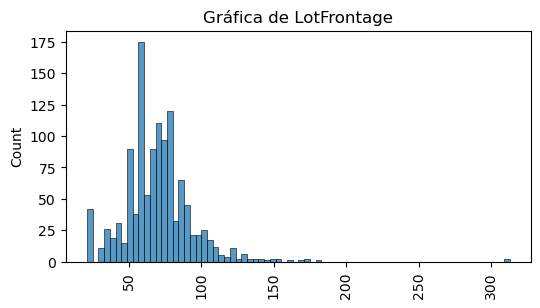

In [14]:
# Graficar distribución de una variable numérica
plt.figure(figsize=(6,3), dpi=100)

sns.histplot(x='LotFrontage', data=df).set(title=f'Gráfica de LotFrontage', xlabel=None )
plt.xticks(rotation=90)
plt.show()

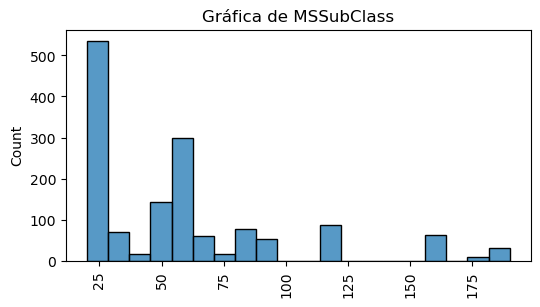

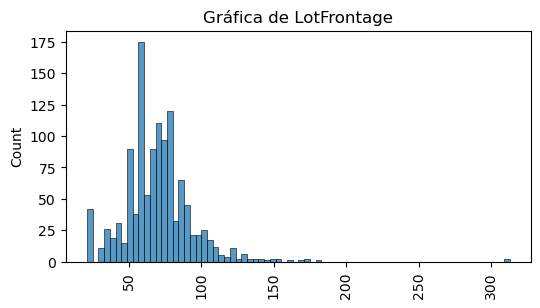

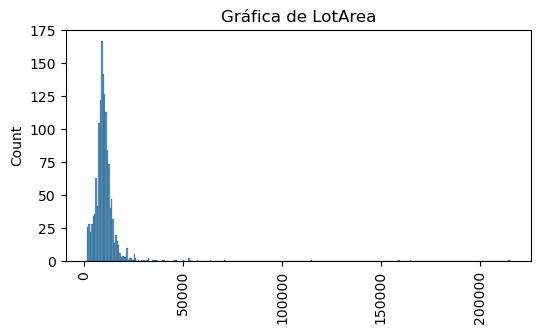

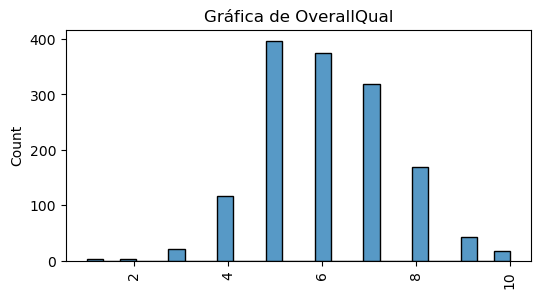

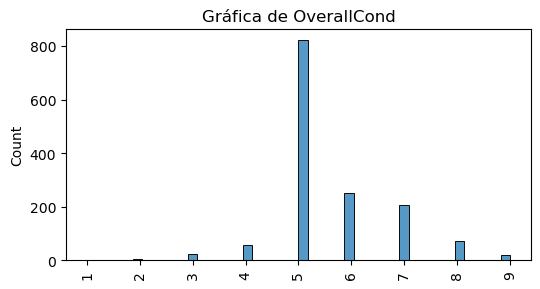

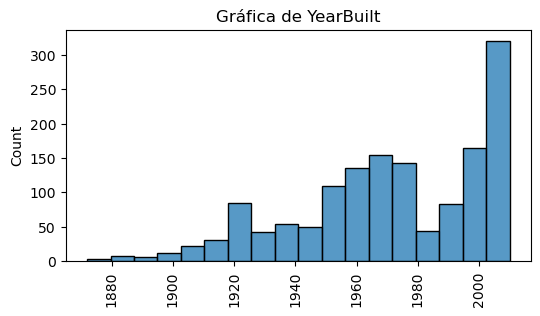

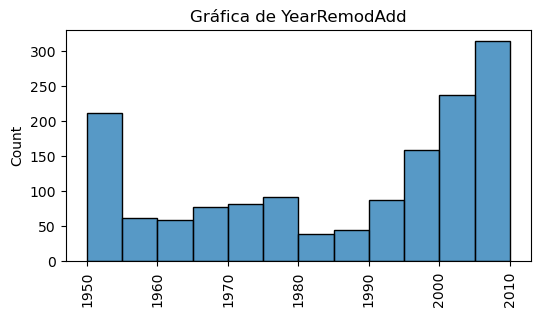

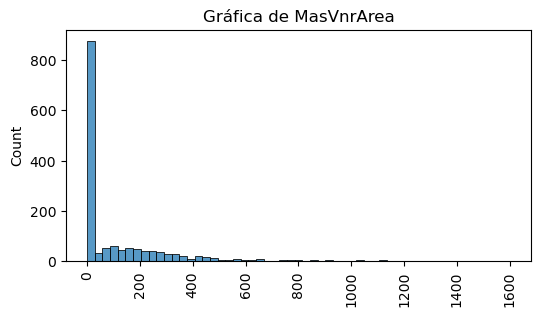

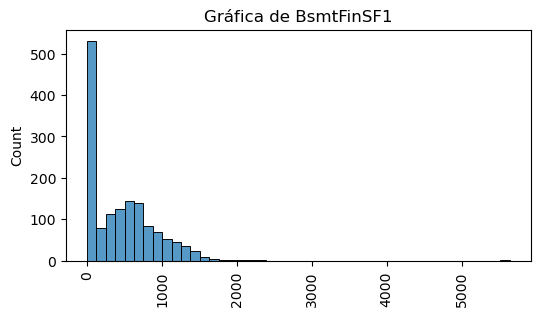

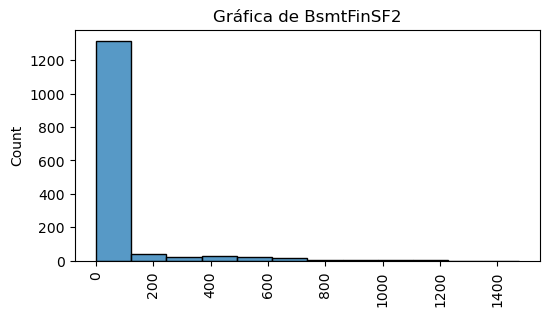

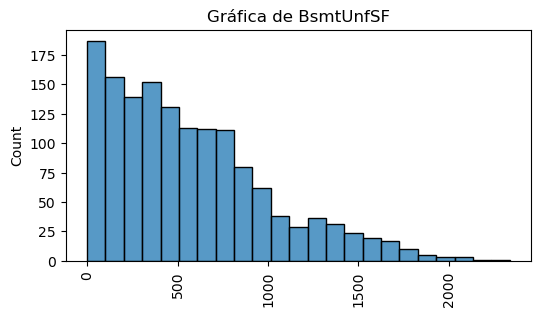

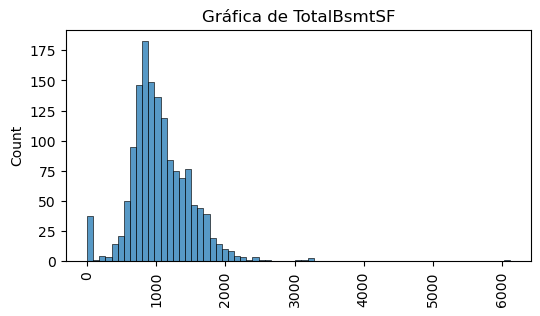

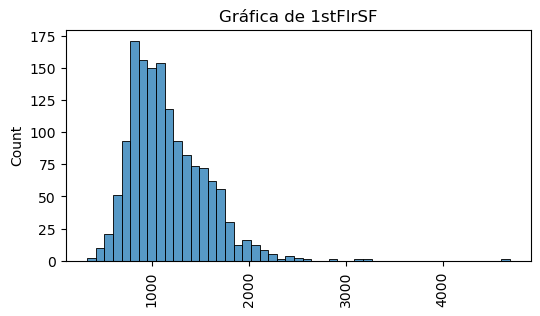

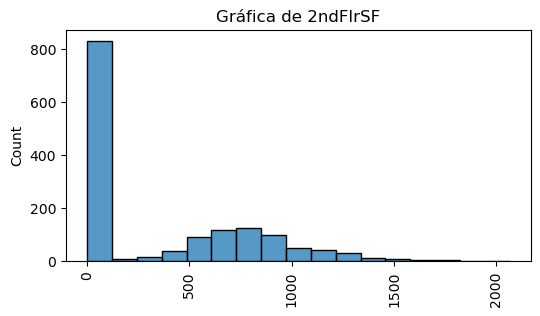

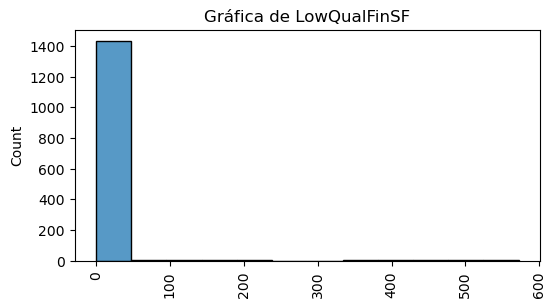

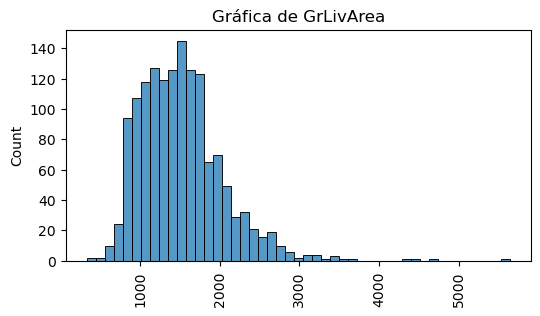

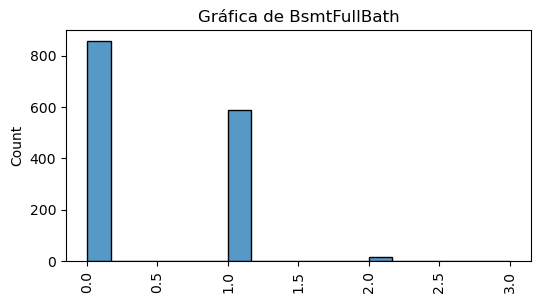

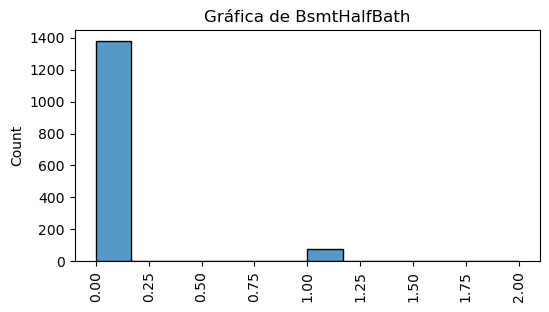

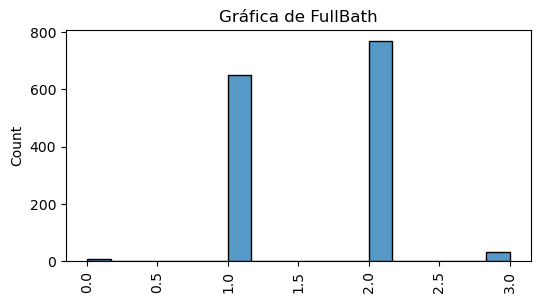

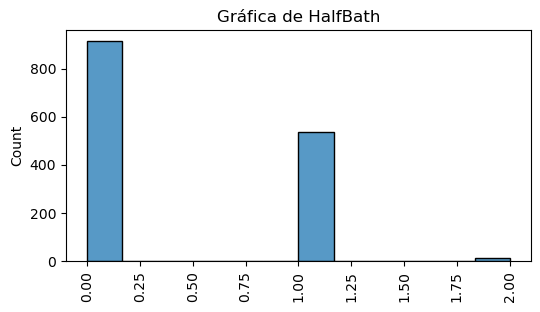

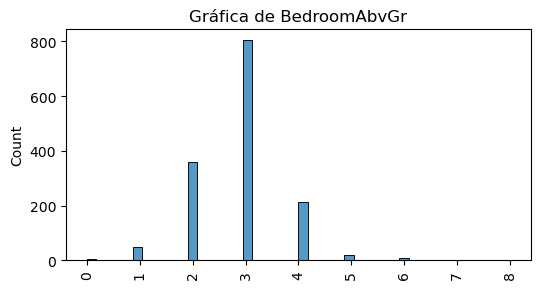

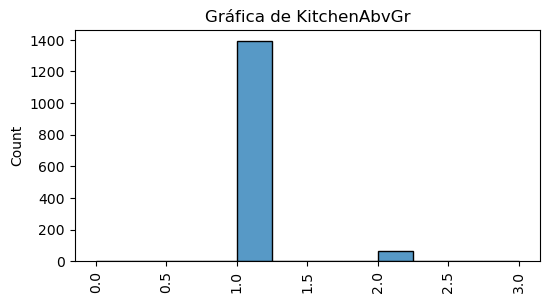

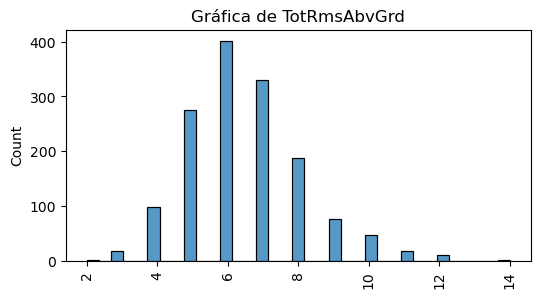

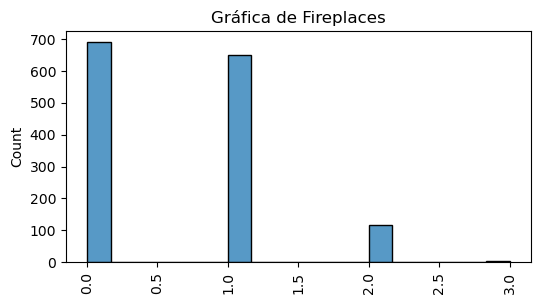

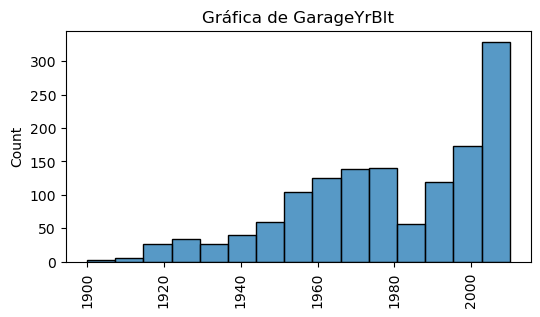

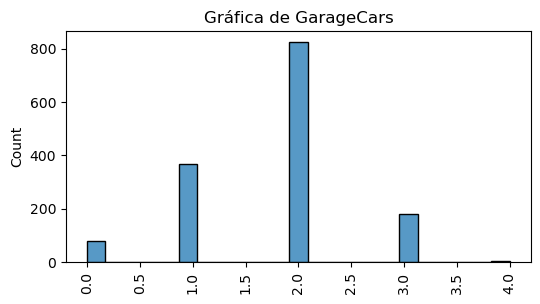

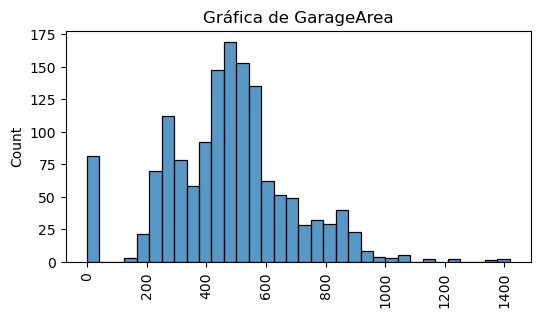

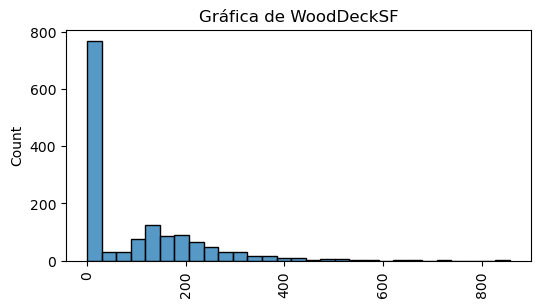

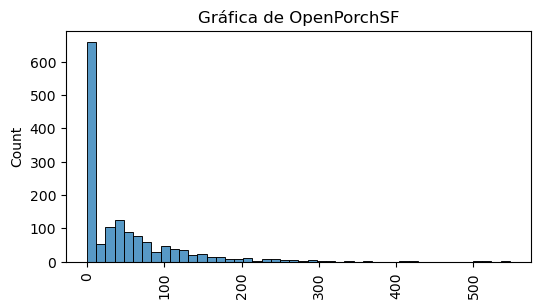

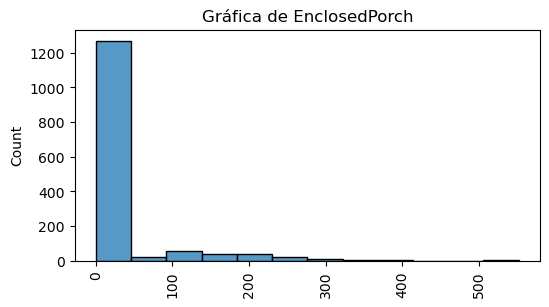

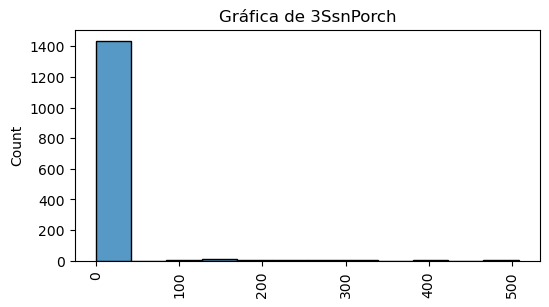

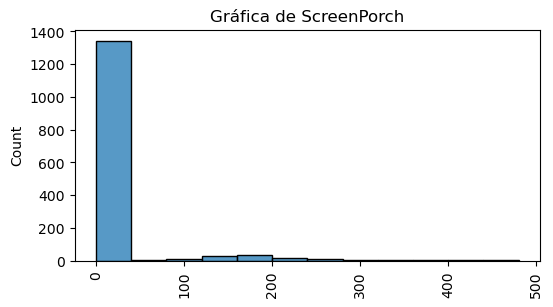

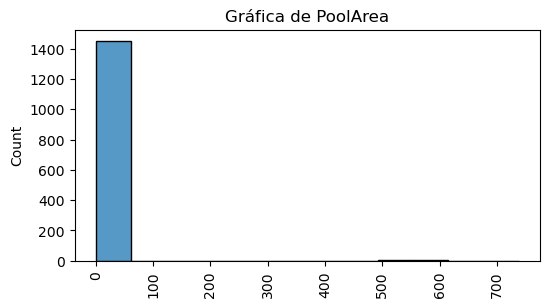

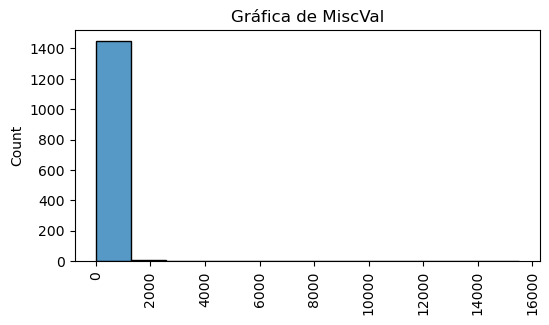

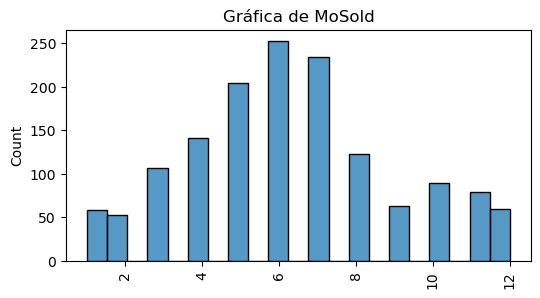

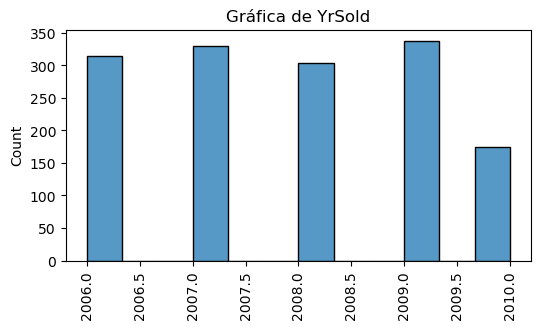

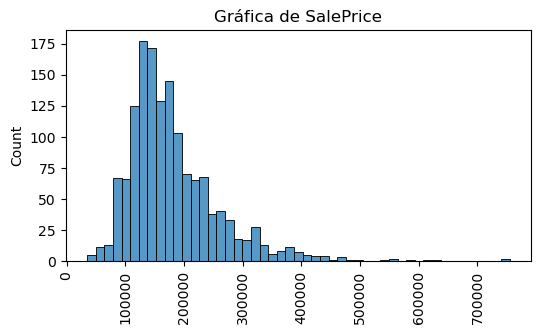

In [15]:
for var_num in df.select_dtypes(np.number):
    plt.figure(figsize=(6,3), dpi=100)
    sns.histplot(x=var_num, data=df).set(title=f'Gráfica de {var_num}', xlabel = None)
    plt.xticks(rotation=90)
    plt.show()

In [16]:
# Descripción de variable objetivo

df['SalePrice'].describe() # media > mediana ==> distribución asimétrica positiva

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

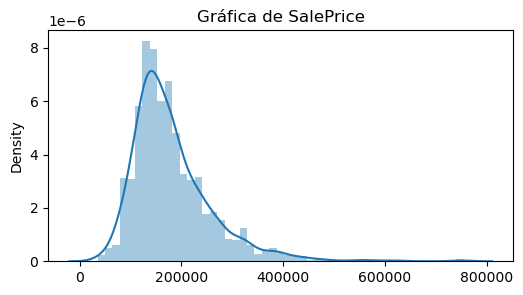

In [17]:
# Histograma de variable objetivo
plt.figure(figsize=(6,3), dpi=100)
sns.distplot(df['SalePrice']).set(title=f'Gráfica de SalePrice', xlabel=None);

In [18]:
# Simetría y Curtosis
print(f"Skewness: {df['SalePrice'].skew():.3}") # positiva (right tail)
print(f"Kurtosis: {df['SalePrice'].kurt():.3}") # (excess kurtic > 0) Leptocurtica (aunque gráficamente parece mesocurtica)

Skewness: 1.88
Kurtosis: 6.54


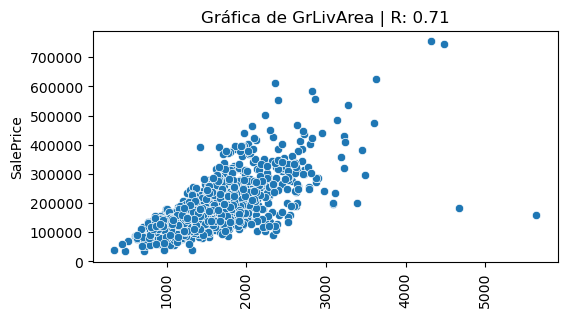

In [19]:
# Graficar variable numérica contra la variable objetivo
corr = df[['GrLivArea', 'SalePrice']].corr().loc['GrLivArea', 'SalePrice'] # correlación de Pearson
plt.figure(figsize=(6,3), dpi=100)
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice']).set(title=f'Gráfica de GrLivArea | R: {corr:.2}', xlabel=None)
plt.xticks(rotation=90)
plt.show()

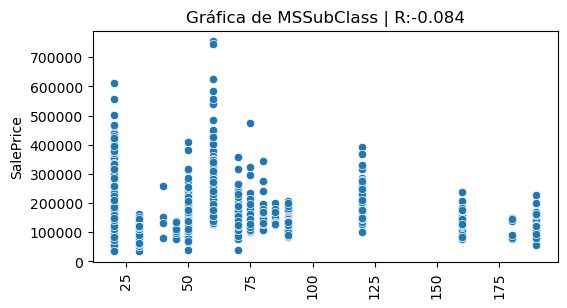

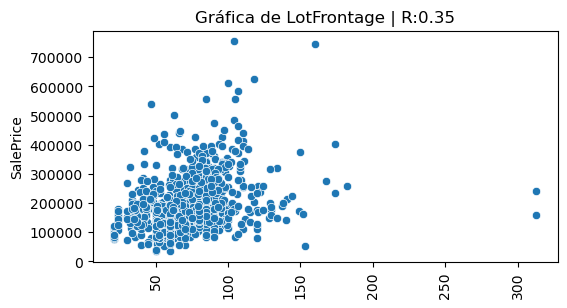

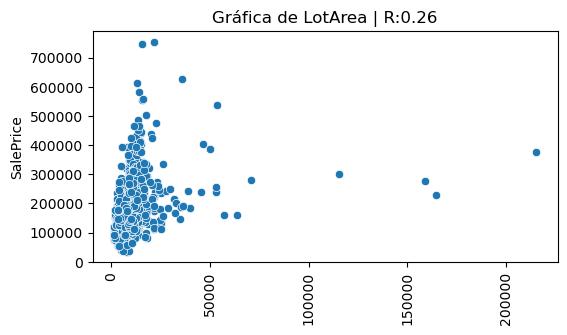

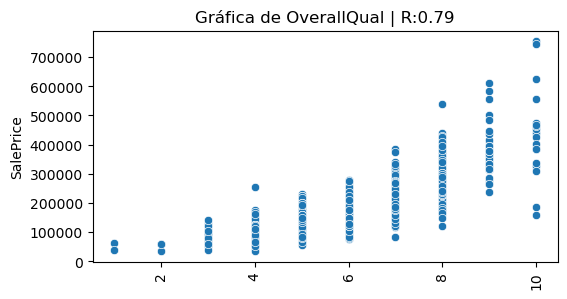

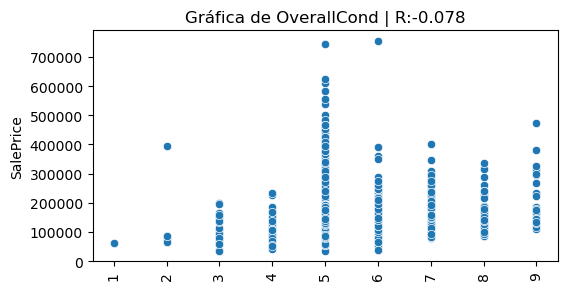

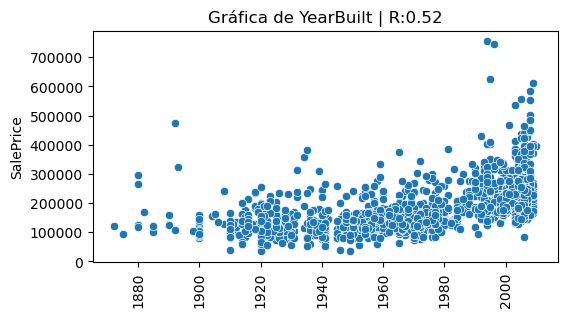

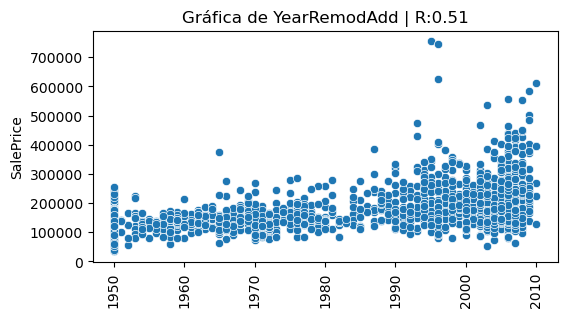

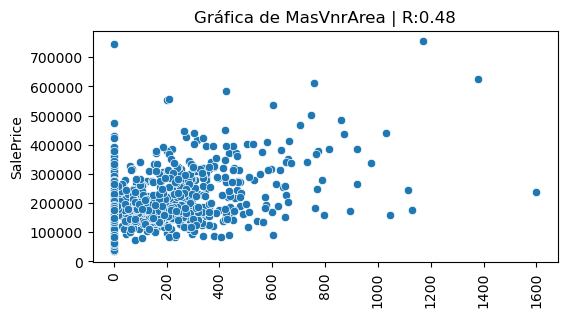

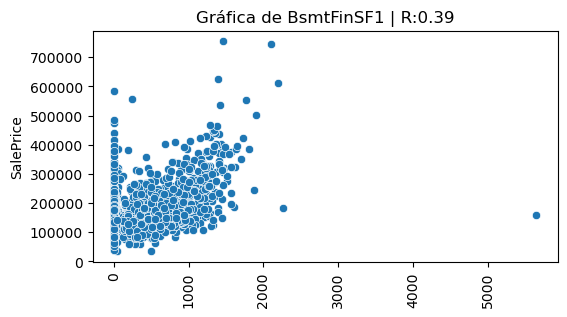

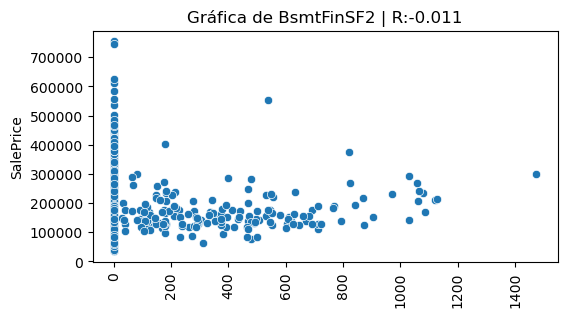

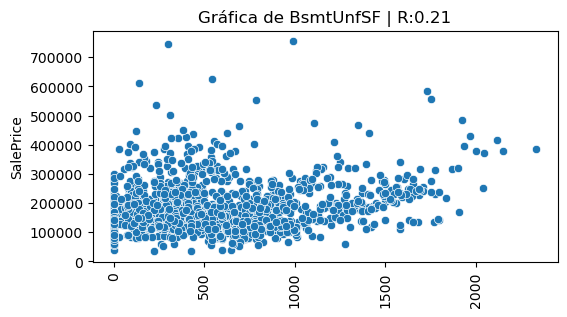

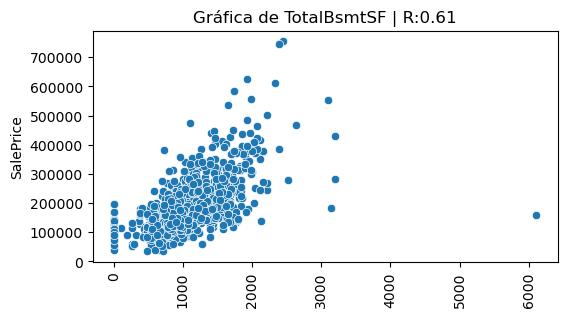

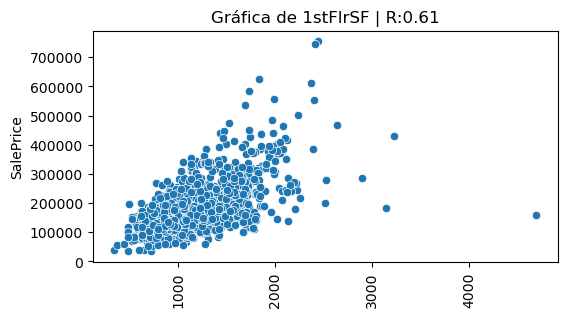

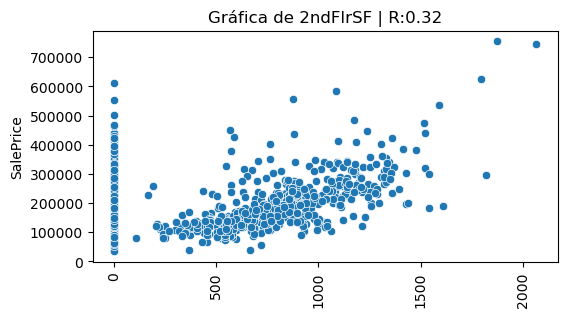

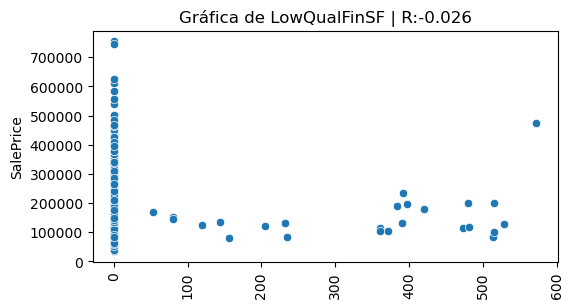

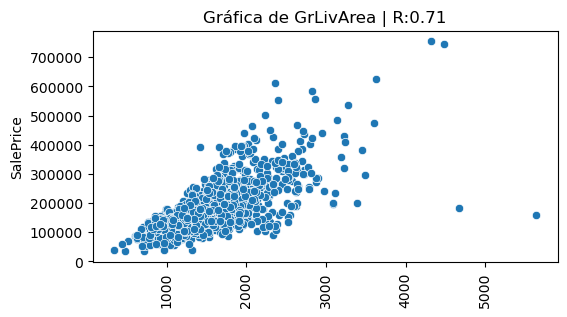

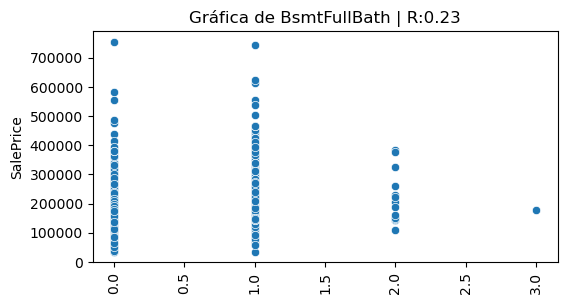

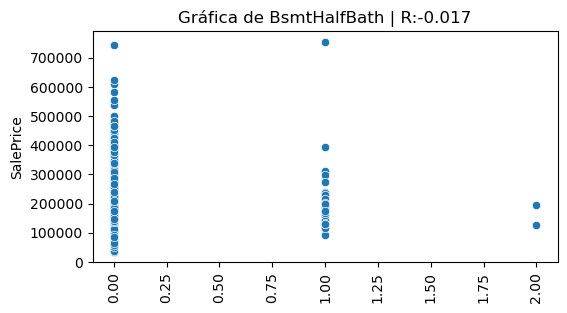

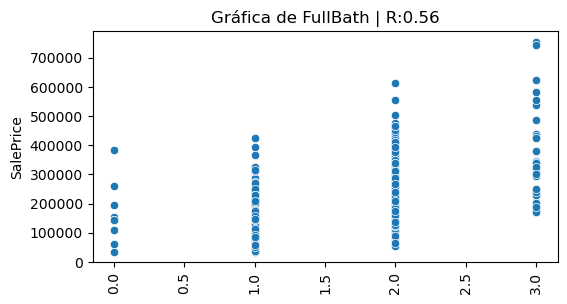

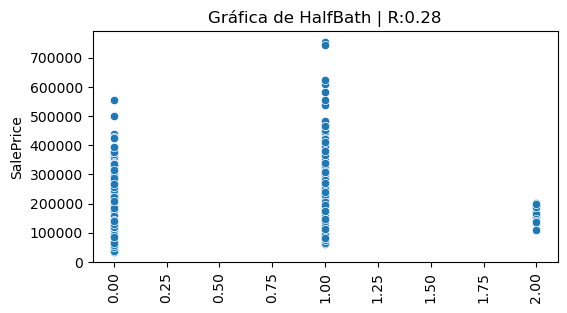

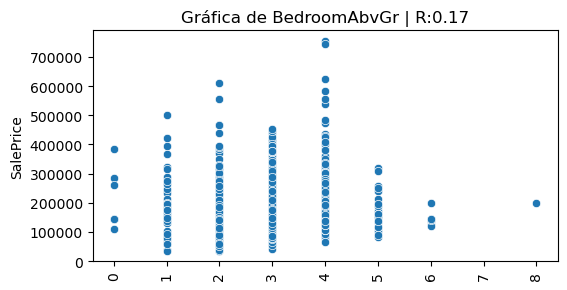

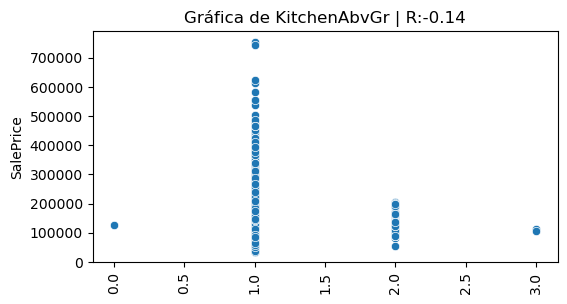

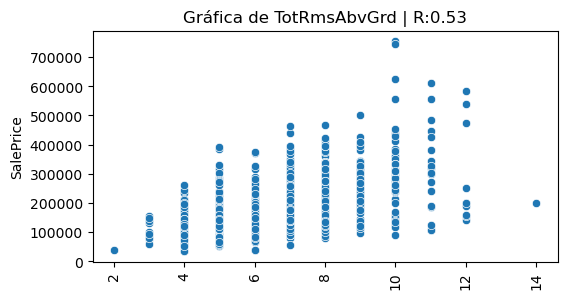

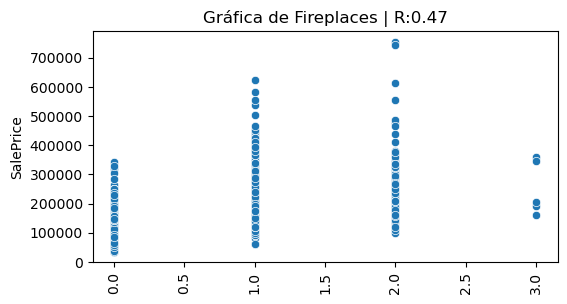

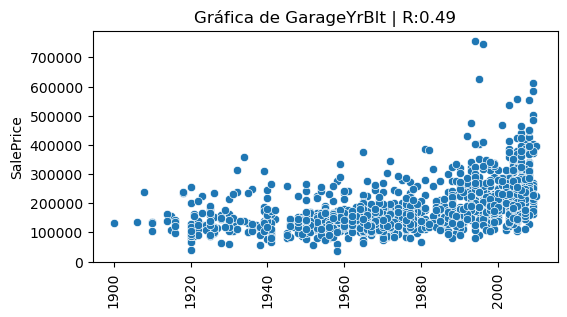

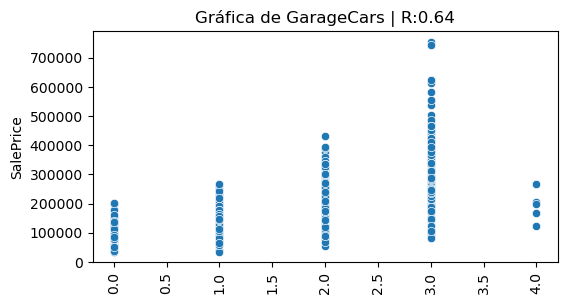

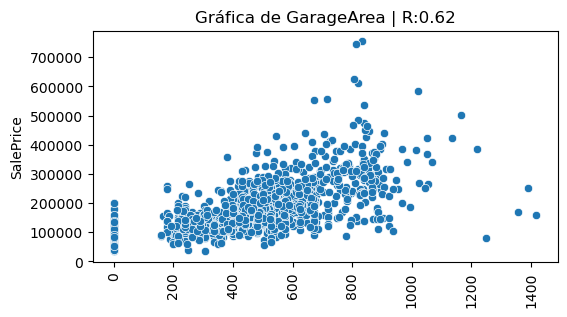

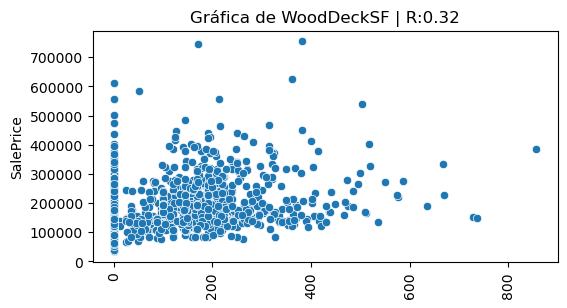

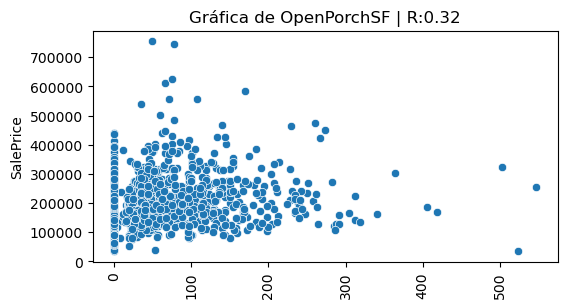

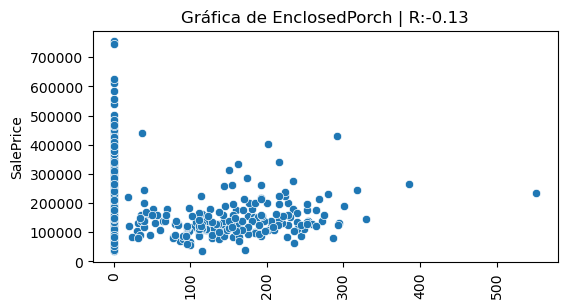

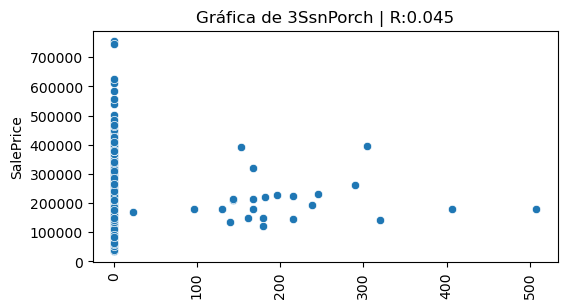

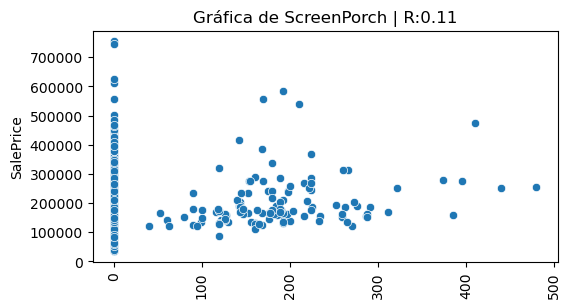

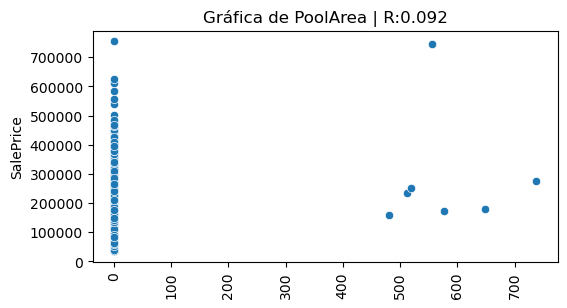

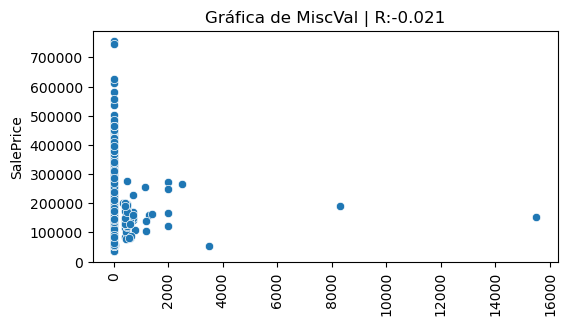

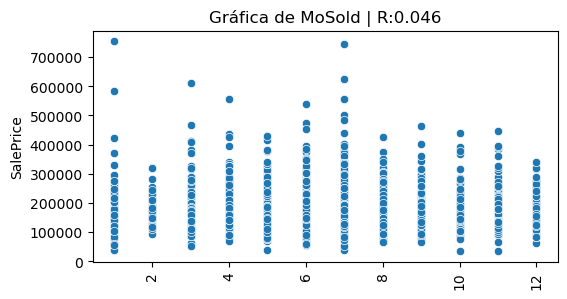

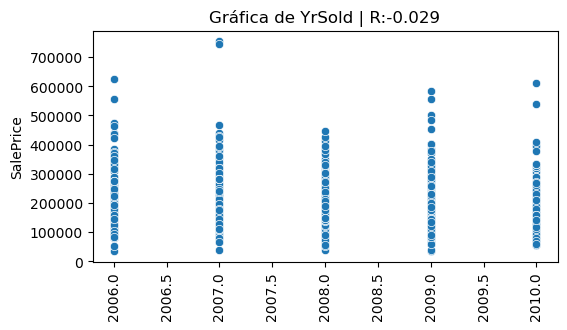

In [20]:
# Idem a lo anterior pero para cada variable mediante un for loop
for var_num in df.select_dtypes(np.number).columns:
    target_var = 'SalePrice'
    corr = df[[var_num, target_var]].corr().loc[var_num, target_var]
    if var_num == target_var:
        continue
    try:
        plt.figure(figsize=(6,3), dpi=100)
        sns.scatterplot(x=df[var_num], y=df[target_var]).set(title=f'Gráfica de {var_num} | R:{corr:.2}', xlabel=None)
        plt.xticks(rotation=90)
        plt.show()
    except:
        print(f"Problems with column: {var_num}")
        pass

### De las variables categóricas, lista las diferentes categorías y hallar frecuencia de cada una de ellas.

In [21]:
# Variables categóricas
df.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
# Describir variables categóricas incluyendo frecuencia de la categoría más común
df.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [23]:
# Lista de variables categóricas y sus categorías
df.select_dtypes('object').apply(lambda x: x.unique())

MSZoning                                 [RL, RM, C (all), FV, RH]
Street                                                [Pave, Grvl]
Alley                                            [nan, Grvl, Pave]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, Low, HLS]
Utilities                                         [AllPub, NoSeWa]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                          [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle       [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
RoofStyle               [Gable, Hip, Gambrel, Mansard, Flat, Shed]
RoofMatl         [CompShg, WdShngl, Metal, WdShake, Membran, T

In [24]:
# Lista de variables categóricas y frecuencias de sus categorías
df.select_dtypes('object').apply(lambda x: x.value_counts().to_dict())

MSZoning         {'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C...
Street                                   {'Pave': 1454, 'Grvl': 6}
Alley                                     {'Grvl': 50, 'Pave': 41}
LotShape            {'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
LandContour         {'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}
Utilities                            {'AllPub': 1459, 'NoSeWa': 1}
LotConfig        {'Inside': 1052, 'Corner': 263, 'CulDSac': 94,...
LandSlope                      {'Gtl': 1382, 'Mod': 65, 'Sev': 13}
Neighborhood     {'NAmes': 225, 'CollgCr': 150, 'OldTown': 113,...
Condition1       {'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRA...
Condition2       {'Norm': 1445, 'Feedr': 6, 'Artery': 2, 'RRNn'...
BldgType         {'1Fam': 1220, 'TwnhsE': 114, 'Duplex': 52, 'T...
HouseStyle       {'1Story': 726, '2Story': 445, '1.5Fin': 154, ...
RoofStyle        {'Gable': 1141, 'Hip': 286, 'Flat': 13, 'Gambr...
RoofMatl         {'CompShg': 1434, 'Tar&Grv': 11, 'WdShngl': 6

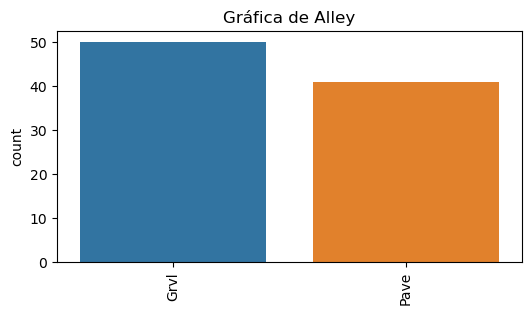

In [25]:
# Gráfica de variable categórica
plt.figure(figsize=(6,3),dpi=100)
sns.countplot(x='Alley', data=df).set(title=f'Gráfica de Alley', xlabel=None)
plt.xticks(rotation=90)
plt.show()

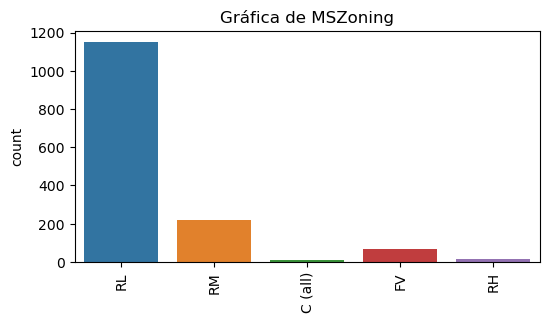

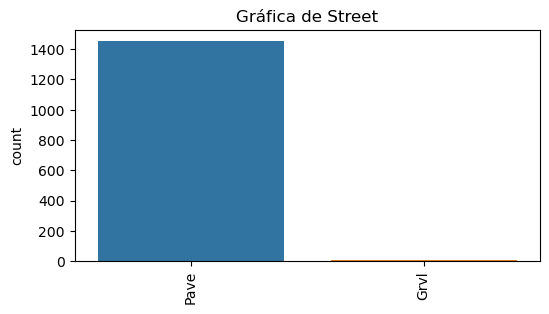

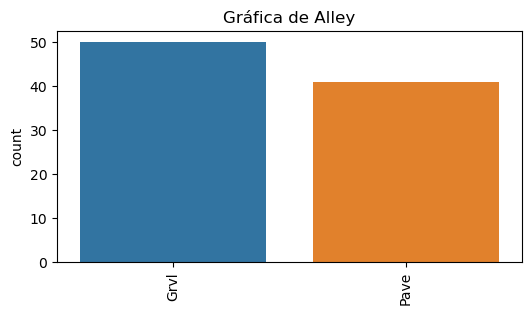

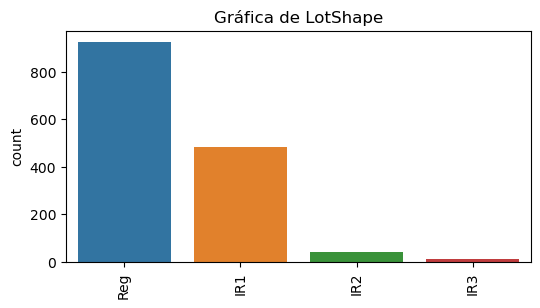

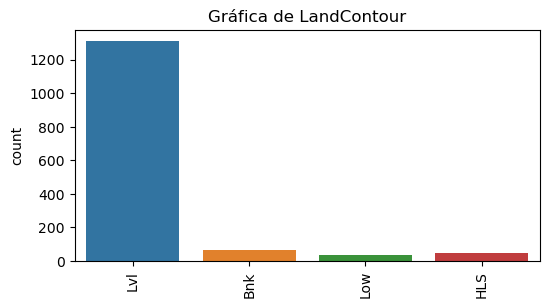

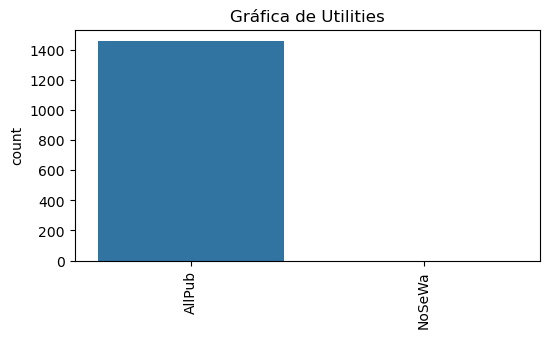

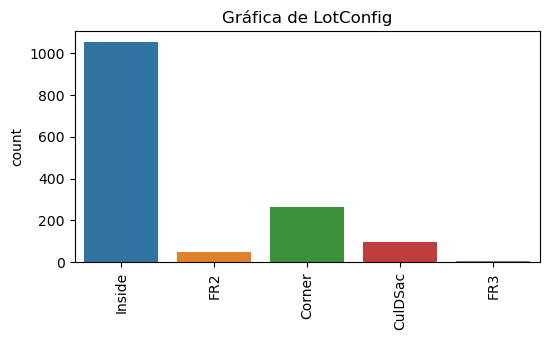

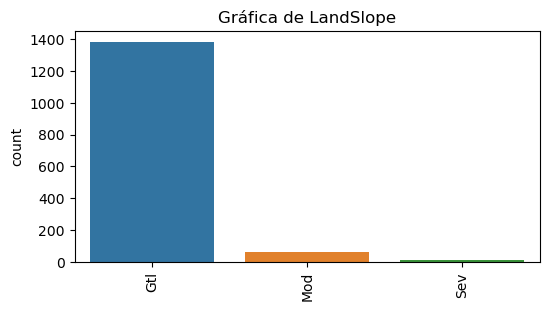

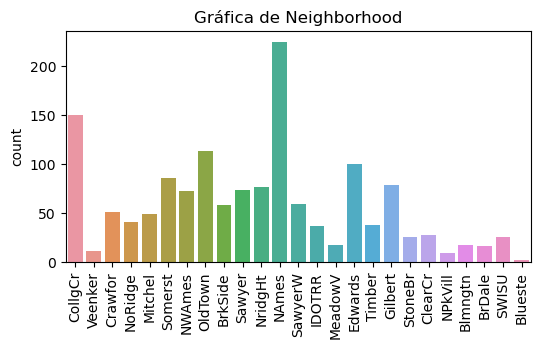

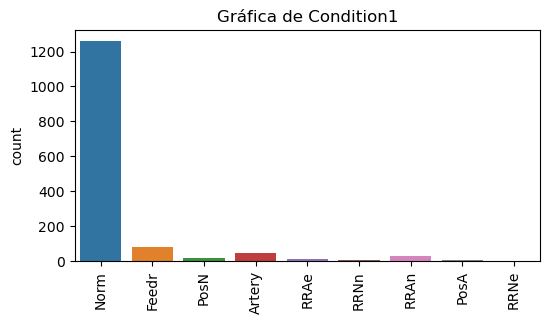

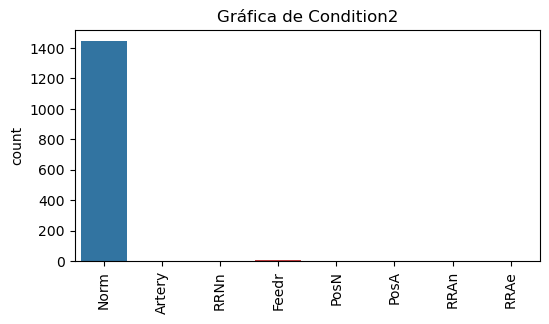

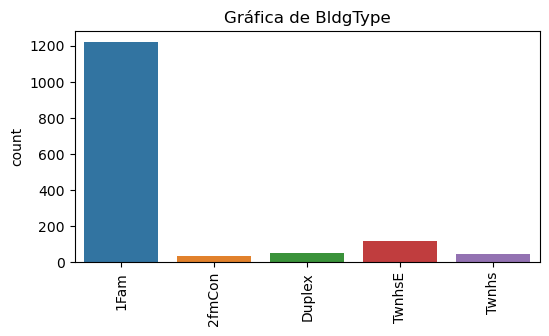

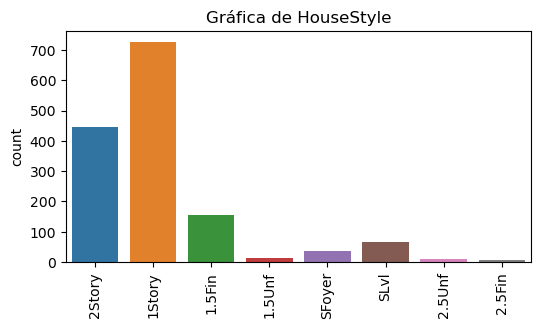

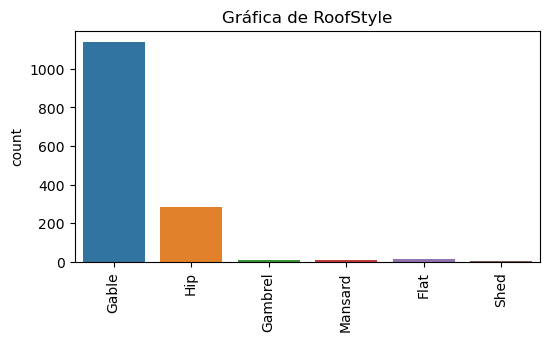

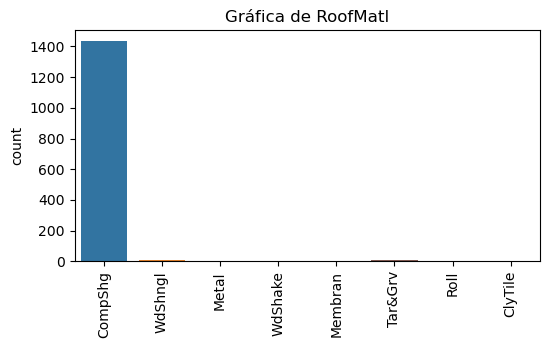

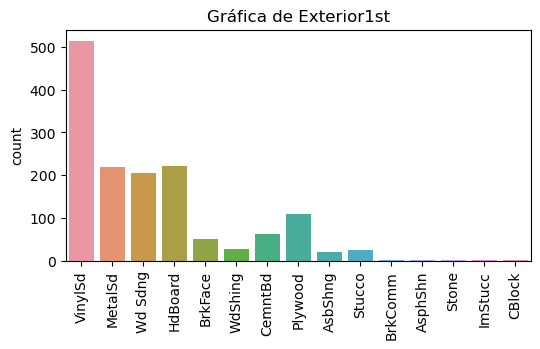

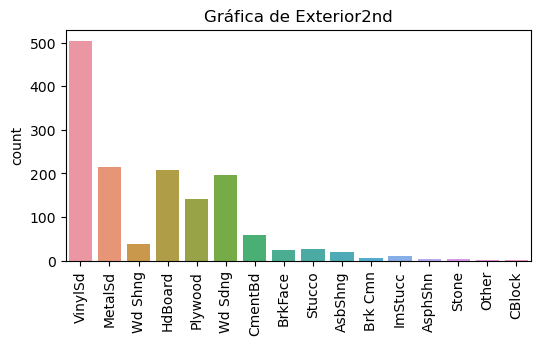

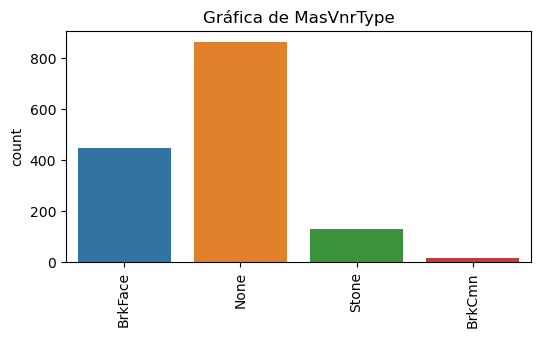

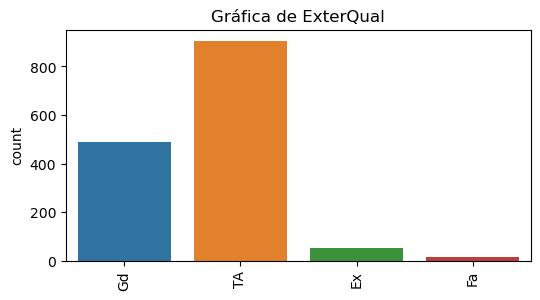

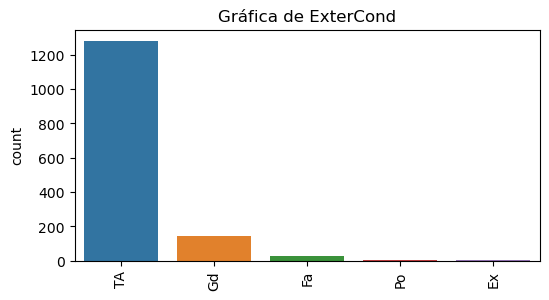

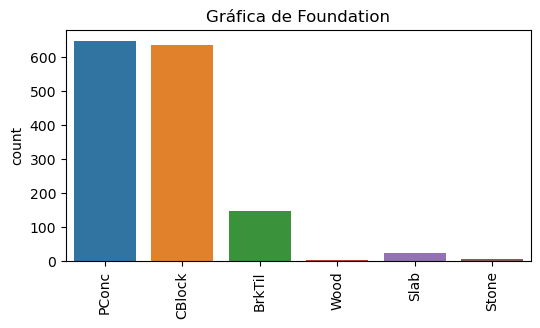

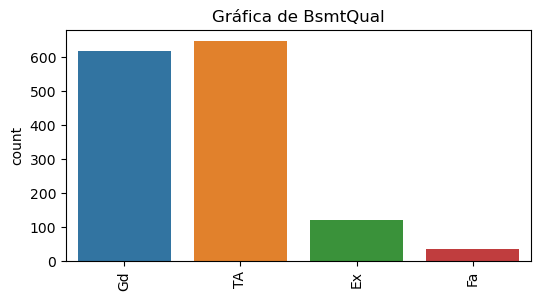

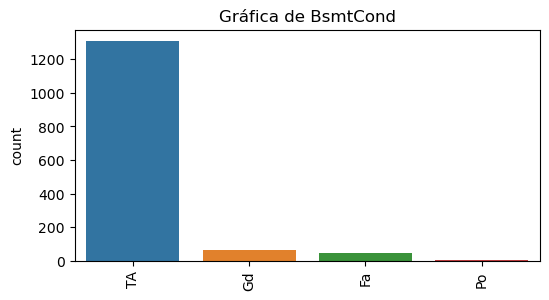

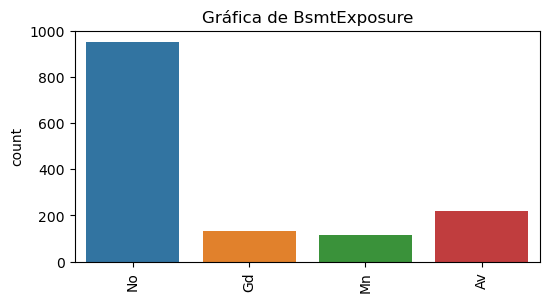

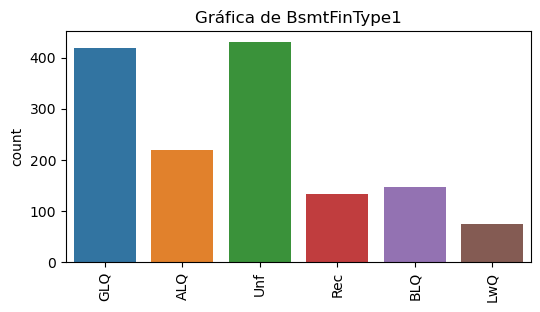

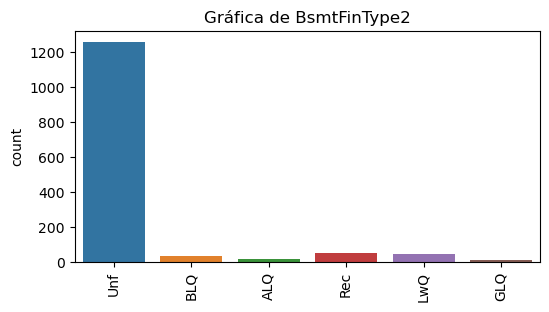

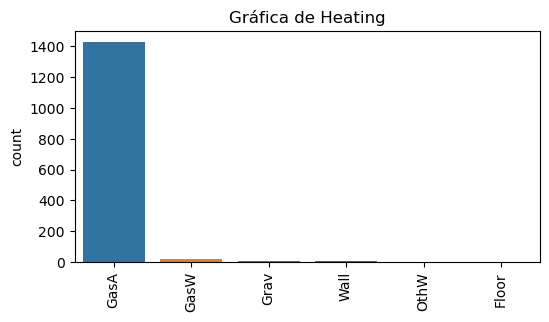

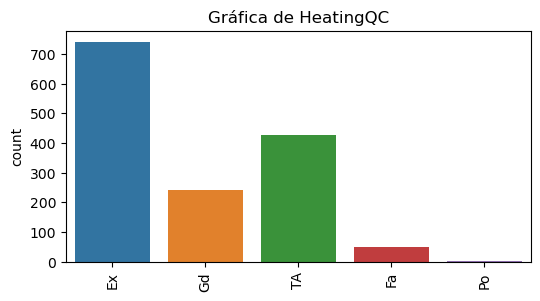

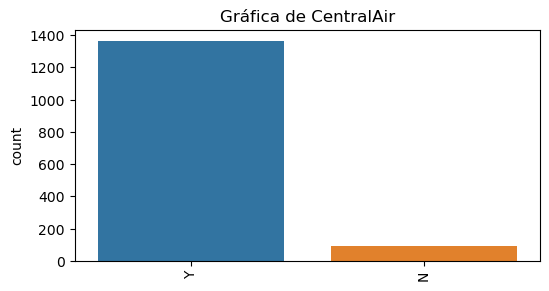

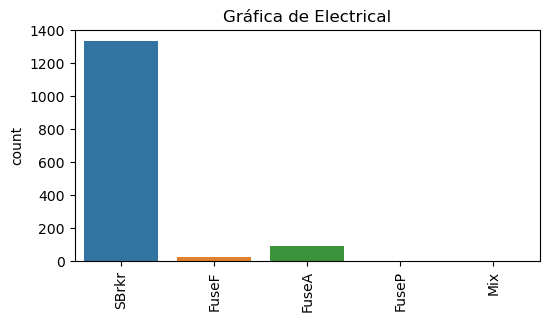

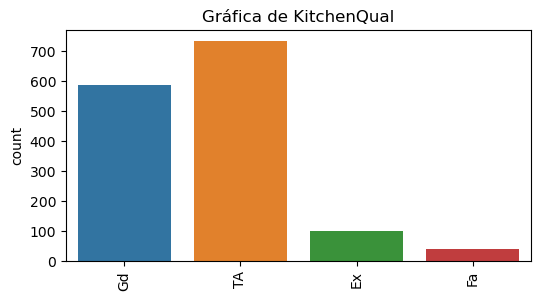

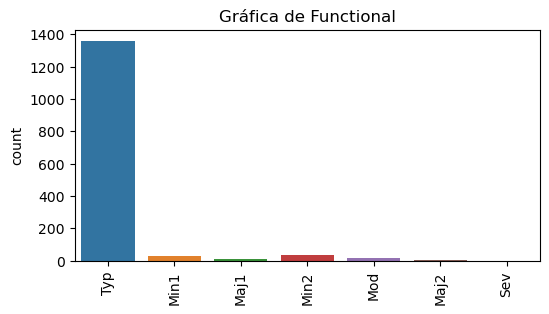

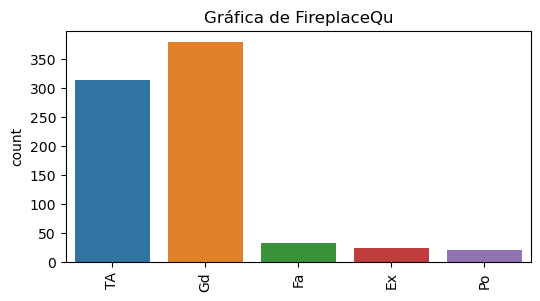

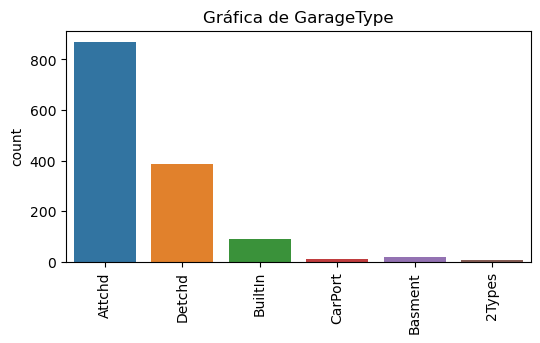

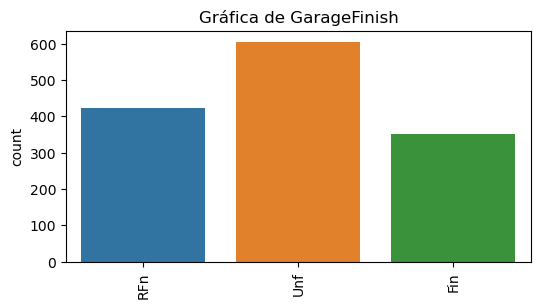

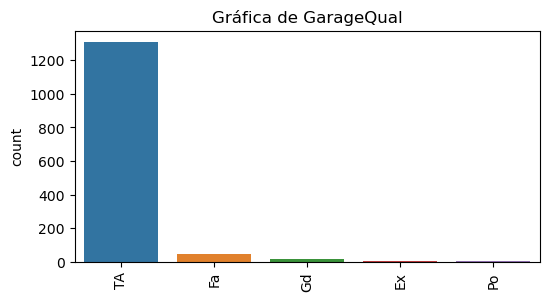

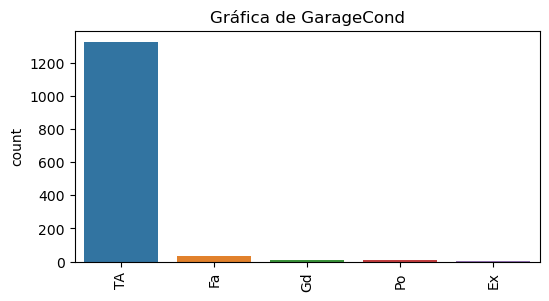

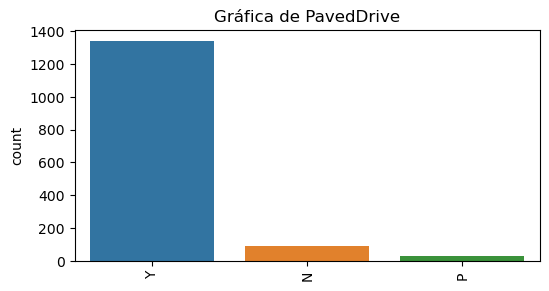

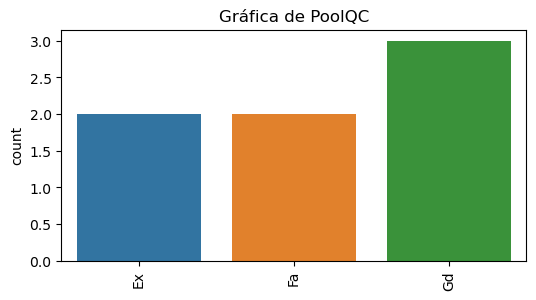

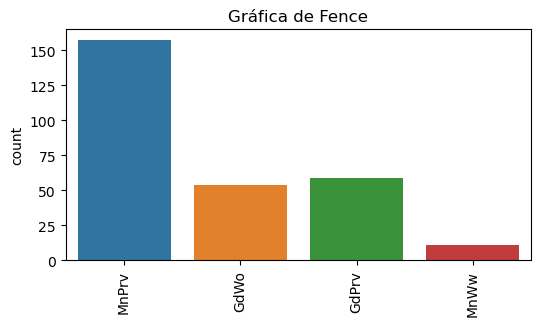

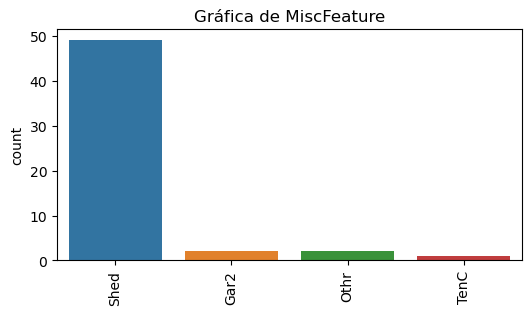

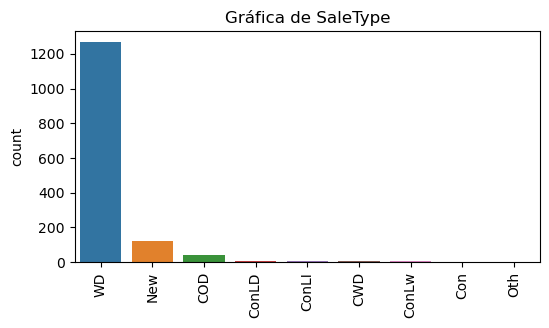

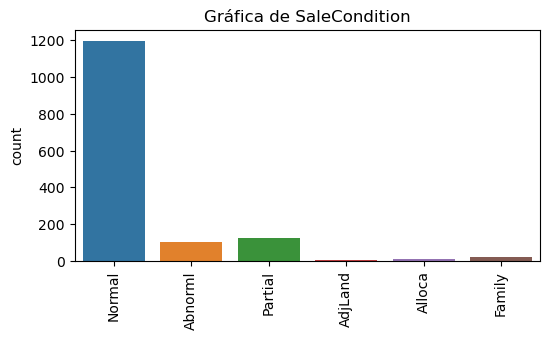

In [26]:
# Graficar variables categóricas
for var_cat in df.select_dtypes('object'):
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(x=var_cat, data=df).set(title=f'Gráfica de {var_cat}', xlabel=None)
    plt.xticks(rotation=90)
    plt.show()

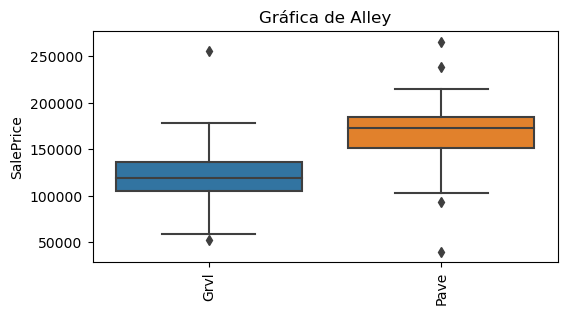

In [27]:
# Graficar variables categóricas contra la variable objetivo
plt.figure(figsize=(6,3), dpi=100)
sns.boxplot(x=df['Alley'], y=df['SalePrice']).set(title=f'Gráfica de Alley', xlabel=None) #alt: violinplot()
plt.xticks(rotation=90)
plt.show()

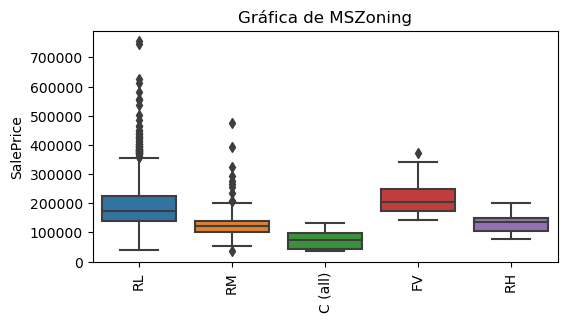

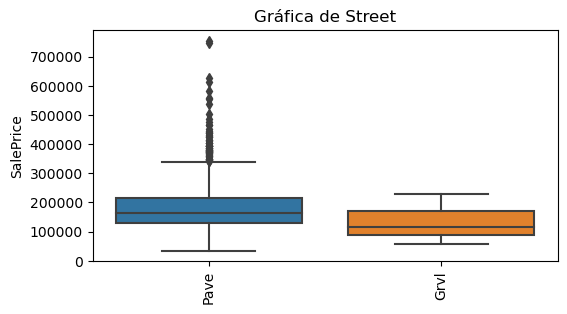

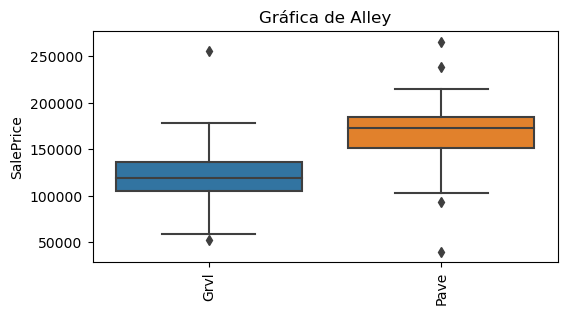

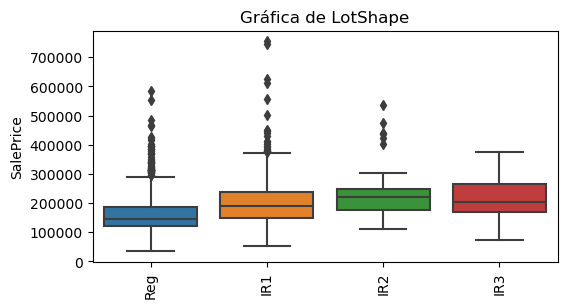

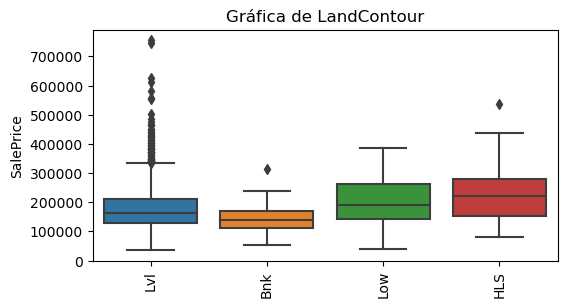

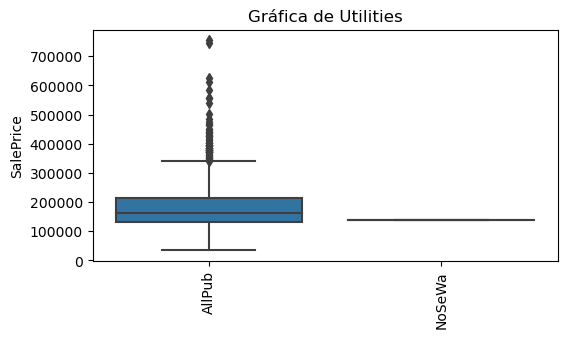

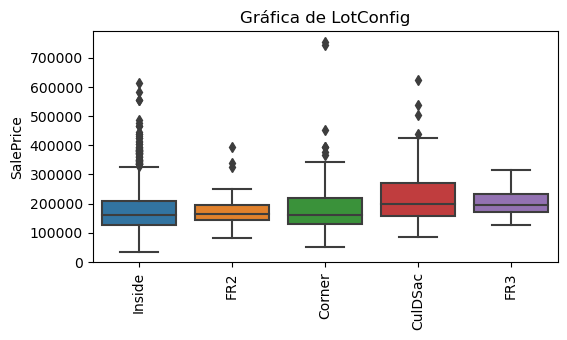

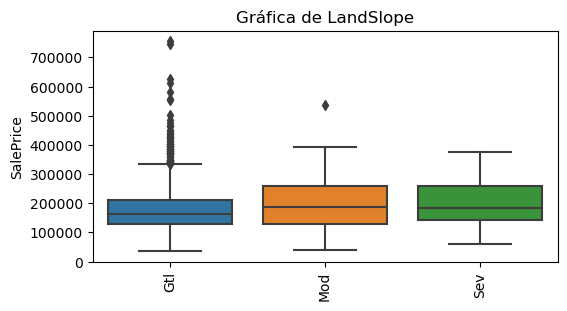

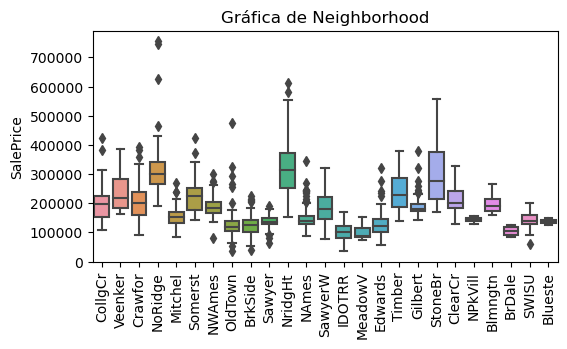

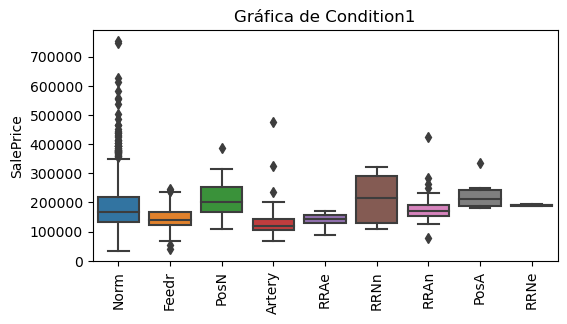

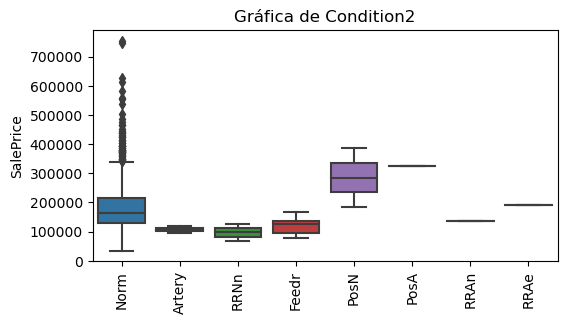

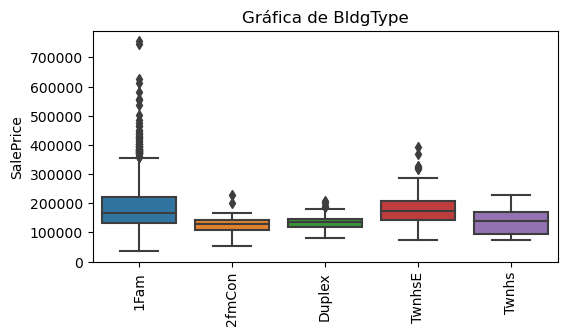

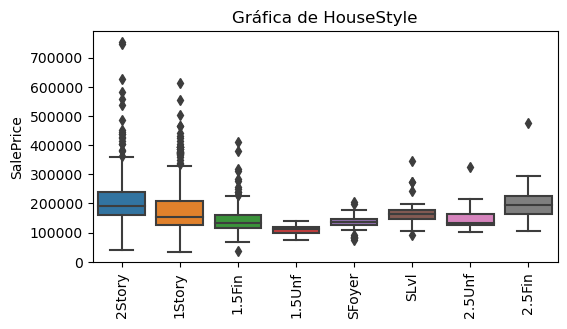

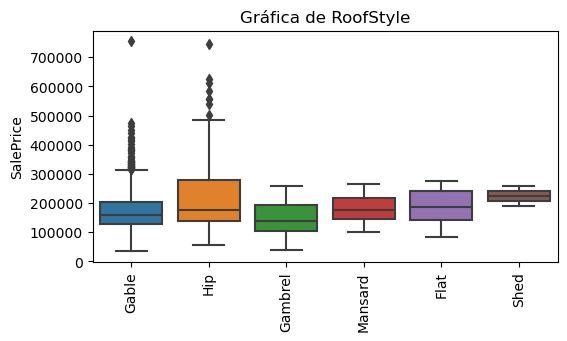

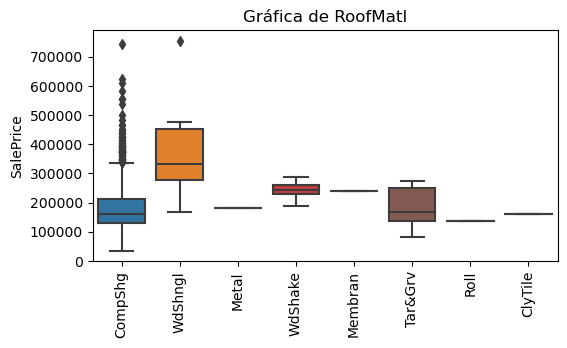

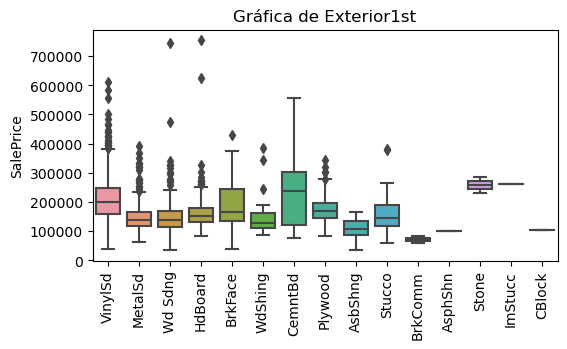

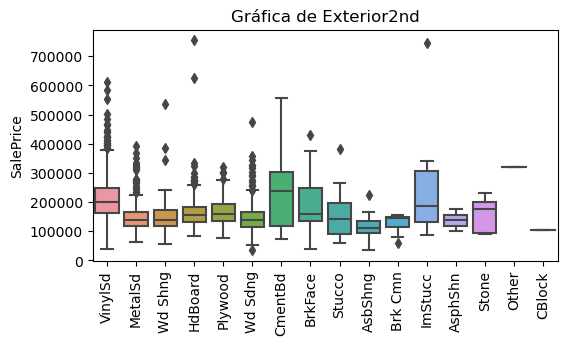

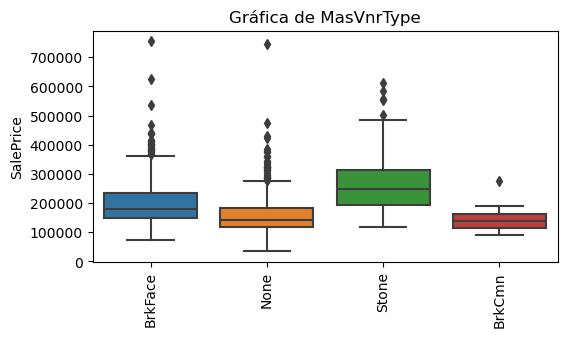

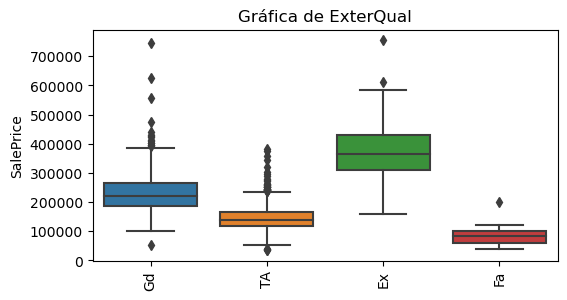

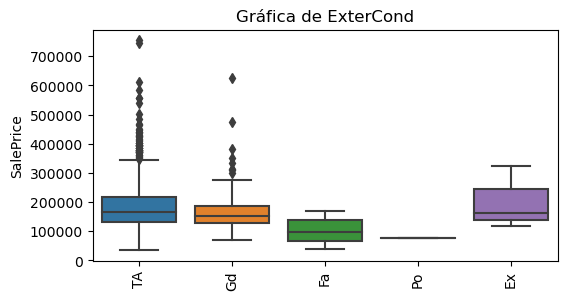

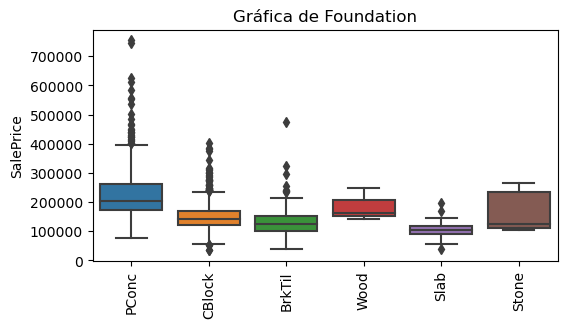

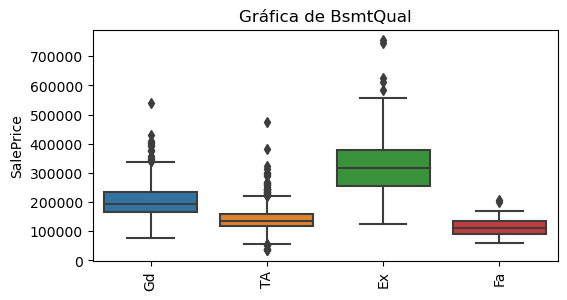

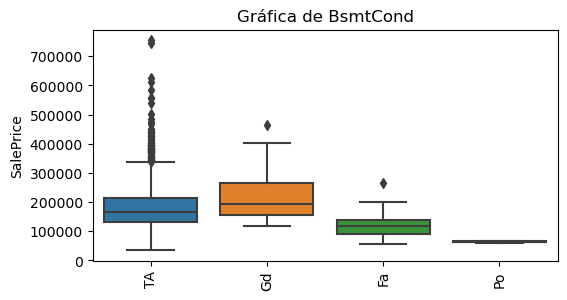

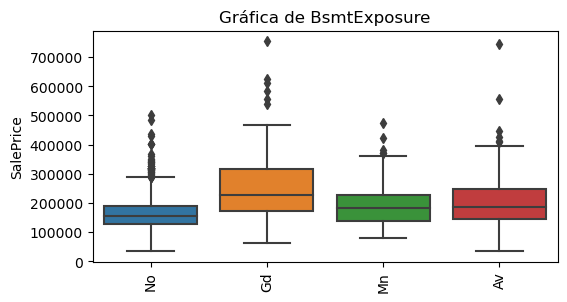

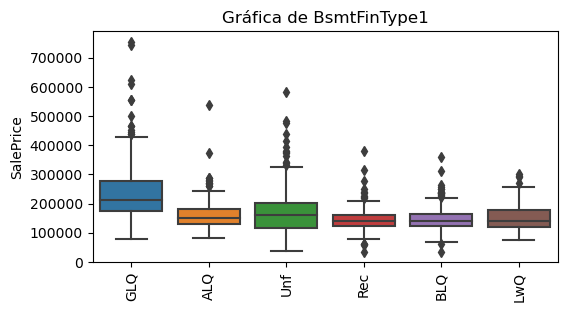

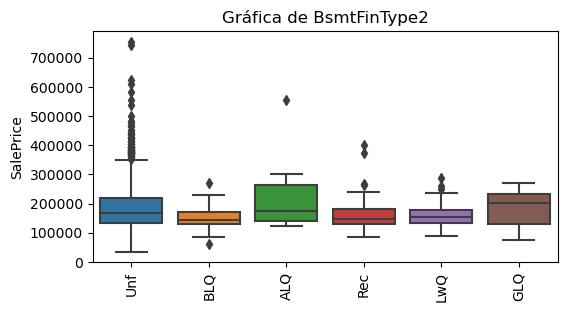

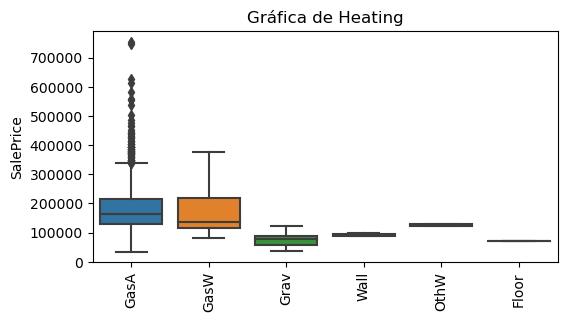

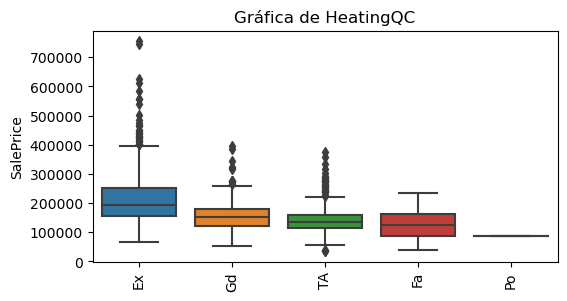

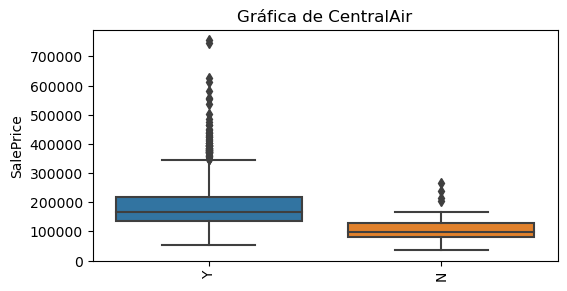

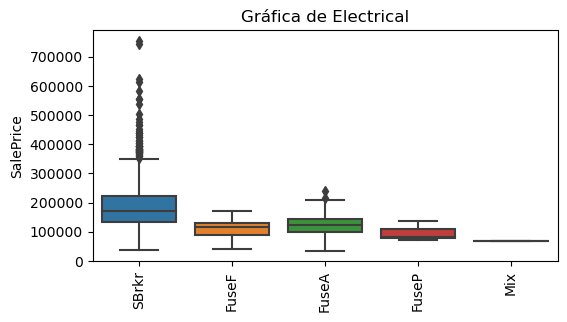

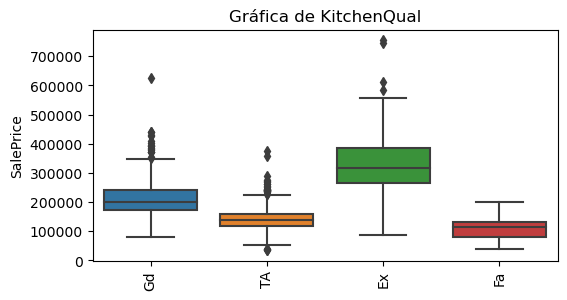

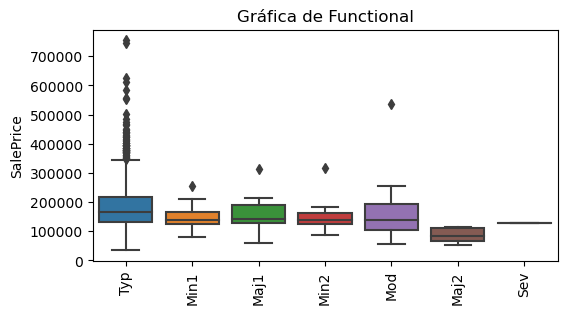

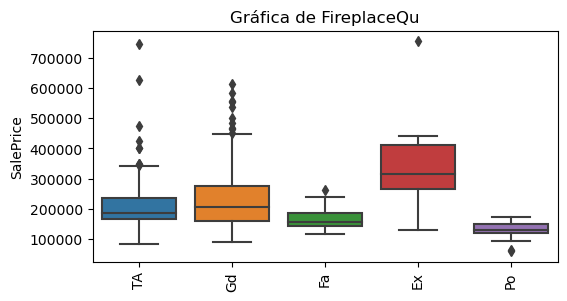

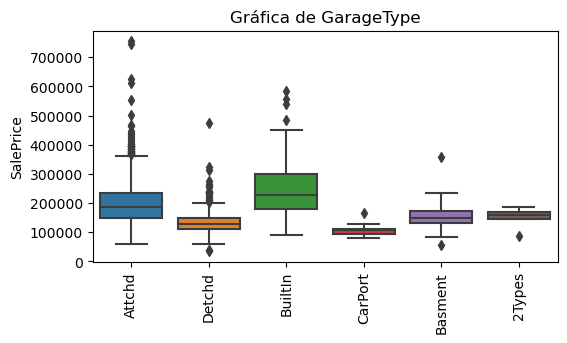

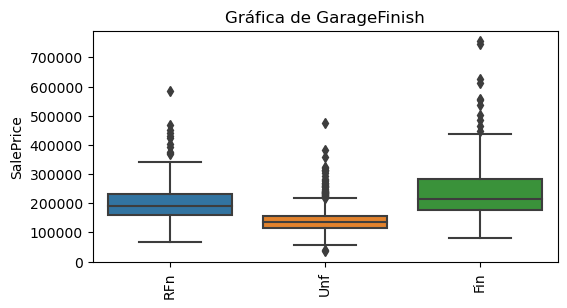

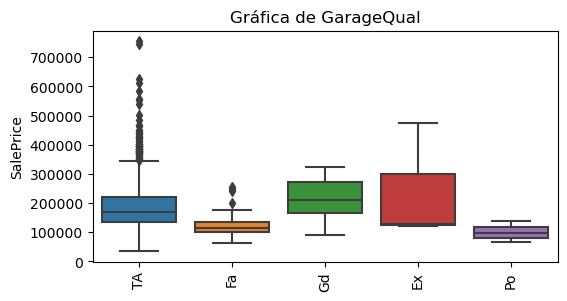

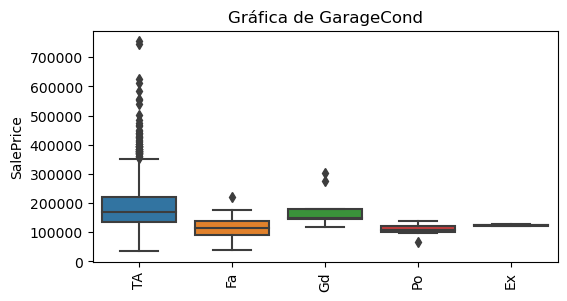

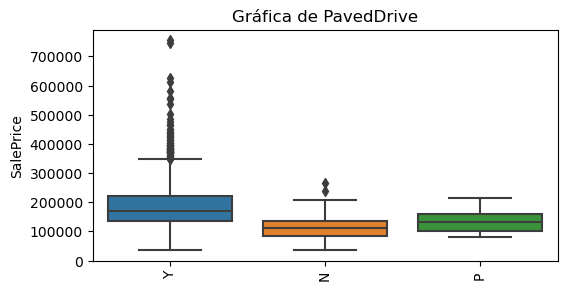

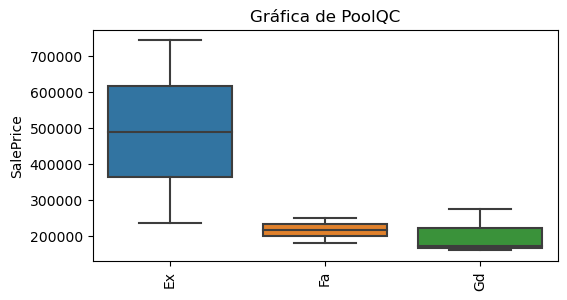

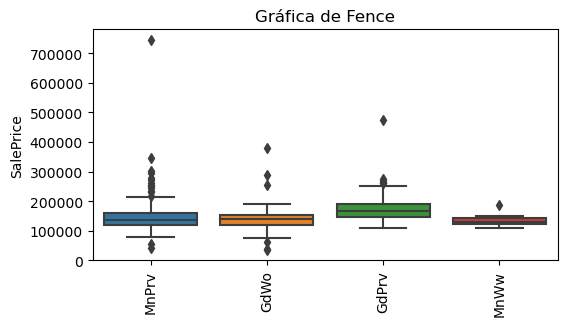

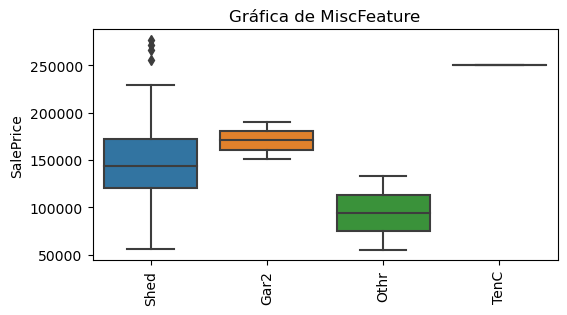

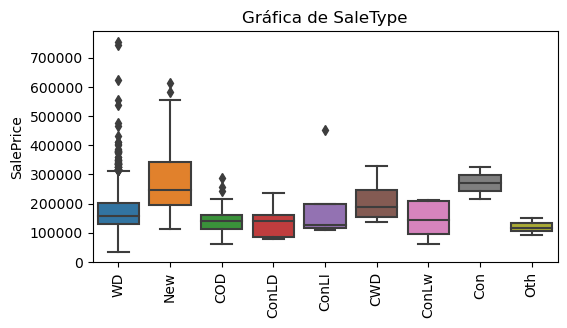

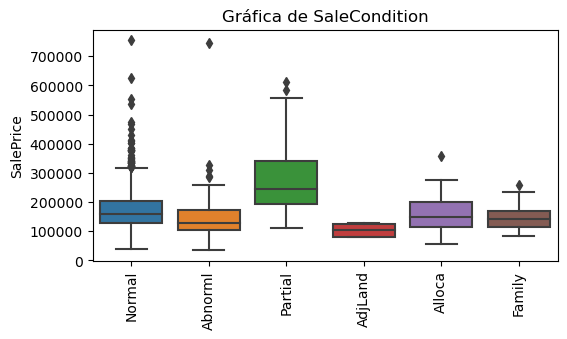

In [28]:
#Idem con for loop
for var_cat in df.select_dtypes('object').columns:
    target_var = 'SalePrice'
    if var_cat == target_var:
        continue
    plt.figure(figsize=(6,3), dpi=100)
    sns.boxplot(x=df[var_cat],y=df[target_var]).set(title=f'Gráfica de {var_cat}', xlabel=None) # alt:violinplot()
    plt.xticks(rotation=90)
    plt.show()

### 3) Matriz de correlaciones

In [29]:
corr = df.corr() # por defecto es Pearson, todas con todas
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

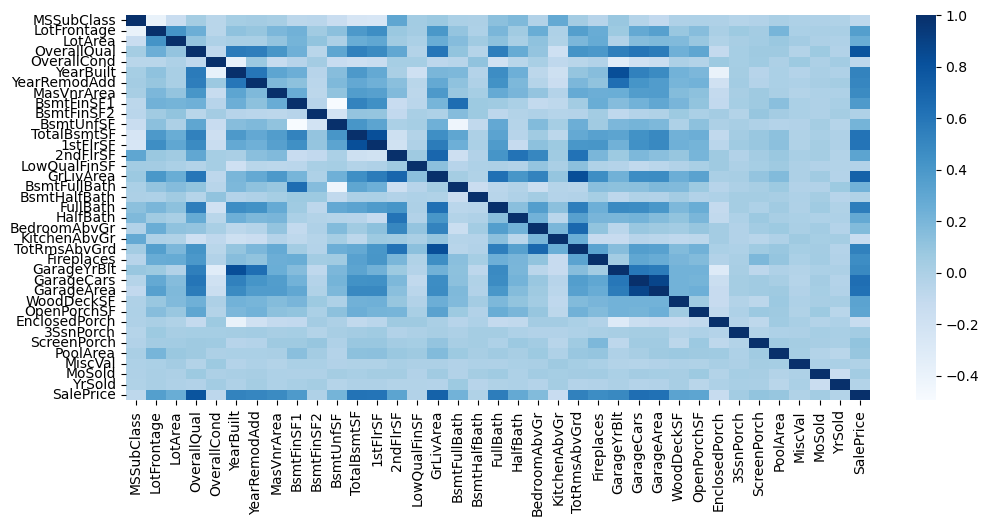

In [30]:
# Mapa de calor de matriz de correlación
plt.figure(figsize=(12,5), dpi=100)
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="Blues",
            annot=False);

In [31]:
# Pares de correlaciones sin la diagonal
corr_unique_pairs = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                    .stack()
                    .sort_values(ascending=False))
df_corr_pairs = pd.DataFrame(corr_unique_pairs, columns=['Corr'])
df_corr_pairs

Corr
GarageCars  GarageArea     0.882475
YearBuilt   GarageYrBlt    0.825667
GrLivArea   TotRmsAbvGrd   0.825489
TotalBsmtSF 1stFlrSF       0.819530
OverallQual SalePrice      0.790982
...                             ...
OverallCond YearBuilt     -0.375983
MSSubClass  LotFrontage   -0.386347
YearBuilt   EnclosedPorch -0.387268
BsmtUnfSF   BsmtFullBath  -0.422900
BsmtFinSF1  BsmtUnfSF     -0.495251

[666 rows x 1 columns]

In [32]:
# Correlación arriba de 0.70
threshold = 0.70
mask = df_corr_pairs['Corr'].abs() > threshold
df_high_corr = df_corr_pairs[mask]
df_high_corr

Corr
GarageCars  GarageArea    0.882475
YearBuilt   GarageYrBlt   0.825667
GrLivArea   TotRmsAbvGrd  0.825489
TotalBsmtSF 1stFlrSF      0.819530
OverallQual SalePrice     0.790982
GrLivArea   SalePrice     0.708624

In [33]:
# Correlaciones con la variable objetivo 'SalePrice'
df_corr_sales = corr.loc['SalePrice'].sort_values(ascending=False).drop(index='SalePrice')
df_corr_sales

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [34]:
df_high_corr

Corr
GarageCars  GarageArea    0.882475
YearBuilt   GarageYrBlt   0.825667
GrLivArea   TotRmsAbvGrd  0.825489
TotalBsmtSF 1stFlrSF      0.819530
OverallQual SalePrice     0.790982
GrLivArea   SalePrice     0.708624

In [35]:
df_corr_sales.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea',
       'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
       'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch',
       'KitchenAbvGr'],
      dtype='object')

In [36]:
# Variables a mantener que son las más correlacionadas con la objetivo
keep_variables = ['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt']

## Paso 3: Preparación de los datos

### Tratamiento de valores faltantes

In [37]:
# Revisar valores nulos
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [38]:
# Revisar porcentaje de valores nulos
pct_missing = (df.isnull().mean()*100).sort_values(ascending=False) # Series
s_missing = pct_missing[pct_missing > 0]
s_missing

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Valores faltantes superiores al 80% se eliminan. Valores faltantes de bajo porcentaje se reemplazan o se eliminan las filas.

In [39]:
len(s_missing)

19

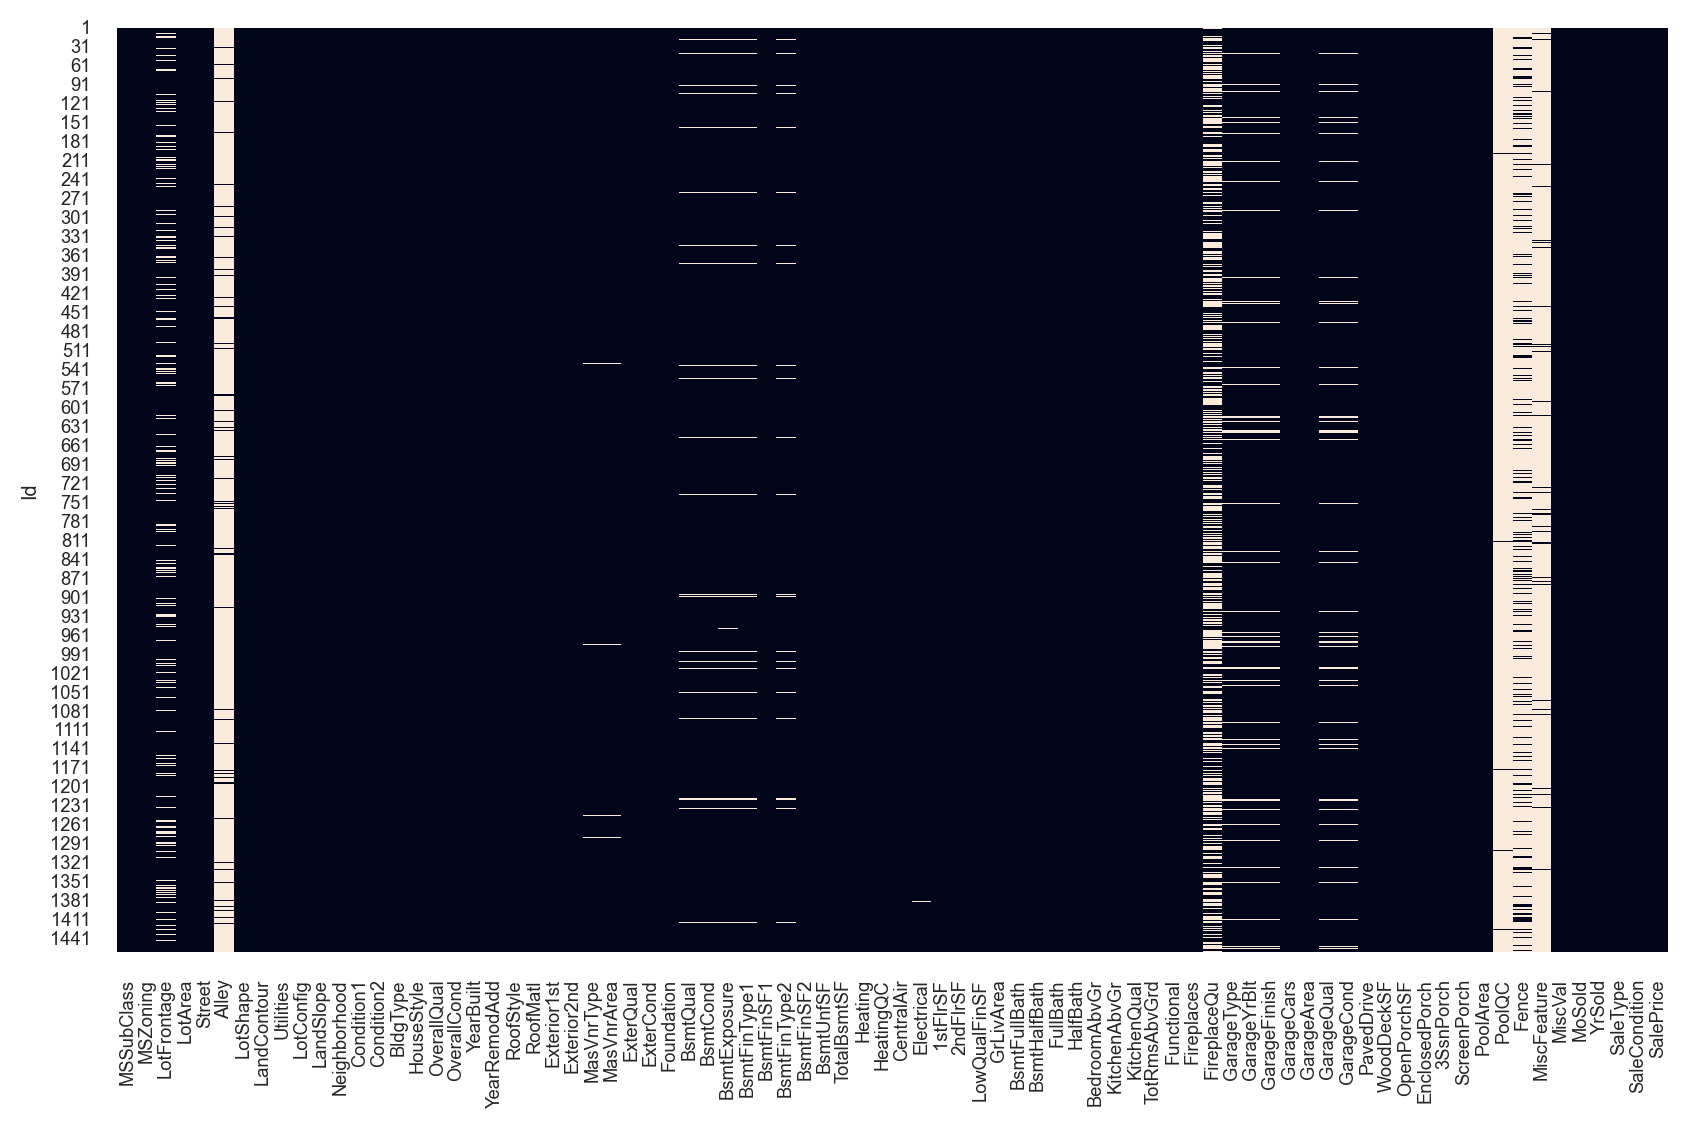

In [40]:
# Graficar valores nulos
sns.set(font_scale=0.6)
sns.heatmap(df.isnull(), cbar=False);

In [41]:
# Definir variables con alto porcentaje de valores nulos (para eliminar)
threshold = 80

mask = pct_missing > threshold
cols_to_drop = pct_missing[mask].index.to_list()
cols_to_drop

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [42]:
# Analizar variable FireplaceQu
print(f"{s_missing['FireplaceQu'] = :.2f} %")

pd.set_option('display.max_columns', None)
df[['Fireplaces', 'FireplaceQu']].head(20).style.highlight_null()

# Es nan cuando no hay chimenea
# Reemplazar por none

s_missing['FireplaceQu'] = 47.26 %


In [43]:
# Analizar variable LotFrontage
print(f"{s_missing['LotFrontage'] = :.2f} %")

pd.set_option('display.max_columns', None)
df[df['LotFrontage'].isnull()].head(10).style.highlight_null()

s_missing['LotFrontage'] = 17.74 %


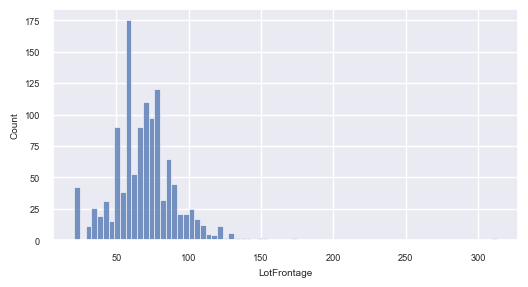

In [44]:
# Para definir el valor a reemplazar, miramos la distribución primero
plt.figure(figsize=(6,3), dpi=100)
sns.histplot(df['LotFrontage']);

In [45]:
# Obtener simetría
df['LotFrontage'].skew() # Simetría positiva = Reemplazar por el valor de la mediana

2.163569142324884

In [46]:
# Ejemplo de obtener mediana
mask = df['Neighborhood']=='NWAmes'
df[mask]['LotFrontage'].median()

80.0

In [47]:
# Valores mediana por colonia
df.groupby('Neighborhood')['LotFrontage'].transform(lambda col: col.fillna(col.median()))[8] #8 es el primer valor nulo

80.0

In [48]:
# Analizar variables de Basement
print(f"{s_missing['BsmtQual'] = :.2f} %")

cols = [col for col in df.columns if "bsmt" in col.lower()]

df[df['BsmtQual'].isnull()][cols].head().style.highlight_null() # Son nulos cuando no hay basement

# 'BsmtExposure': reemplazar con "None"
# 'BsmtFinType2': reemplazar con "None"
# 'BsmtCond': Reemplazar con "None"
# 'BsmtQual': reemplazar con "None"
# 'BsmtFinType2: reemplazar con "None"

s_missing['BsmtQual'] = 2.53 %


In [49]:
# Analizar variables de Garage
print(f"{s_missing['GarageCond'] = :.2f} %")

cols = [col for col in df.columns if "garage" in col.lower()]

df[df['GarageCond'].isnull()][cols].head().style.highlight_null() # Son nulos cuando hay garage

#'GarageYrBlt': reemplazar con valor de YearBuilt (correlación > .80)
#'GarageCond': Reemplazar con "None"
#'GarageType': Reemplazar con "None"
#'GarageFinish': Reemplazar con "None"
#'GarageQual': Reemplazar con "None"

s_missing['GarageCond'] = 5.55 %


In [50]:
# Analizar variable de MasVnrArea y MasVnrType
print(f"{s_missing['MasVnrArea'] = :.2f} %")

df[df['MasVnrArea'].isnull()].head().style.highlight_null() # nulos cuando no hay garage

s_missing['MasVnrArea'] = 0.55 %


In [51]:
df['MasVnrArea'].isnull().sum() # remover filas

8

In [52]:
df['MasVnrArea'].isnull().sum() # remover filas

8

In [53]:
df['Electrical'].isnull().sum() # remover filas

1

### Aplicar operaciones para valores nulos

In [54]:
s_missing

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [55]:
# Eliminar variables con alto porcentaje de valores nulos

df_clean = df.drop(columns=cols_to_drop)

df_clean.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
               ... 
TotalBsmtSF       0
Heating           0
MSZoning          0
CentralAir        0
SalePrice         0
Length: 76, dtype: int64

In [56]:
# Reemplazar valores nulos de FireplaceQu

df_clean['FireplaceQu'] = df_clean['FireplaceQu'].fillna('None')

df_clean.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
               ... 
TotalBsmtSF       0
Heating           0
MSZoning          0
CentralAir        0
SalePrice         0
Length: 76, dtype: int64

In [57]:
# Reemplazar valores nulos de LotFrontage

df_clean['LotFrontage'] = df_clean.groupby('Neighborhood')['LotFrontage'].transform(lambda col: col.fillna(col.median()))

df_clean.isnull().sum().sort_values(ascending=False) # controlando cuantos nulos quedan

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSZoning         0
SalePrice        0
Length: 76, dtype: int64

In [58]:
# Reemplazar valores nulos de Garage

df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].fillna(-1) #fillna(df_clean['YearBuilt'])

cols = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']
df_clean[cols] = df_clean[cols].fillna('None')

df_clean.isnull().sum().sort_values(ascending=False) # controlando cuantos nulos quedan

BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSZoning         0
SalePrice        0
Length: 76, dtype: int64

In [59]:
# Reemplazar valores para variables de basement

cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']
df_clean[cols] = df_clean[cols].fillna('None')

df_clean.isnull().sum().sort_values(ascending=False) # controlando cuantos nulos quedan

MasVnrType      8
MasVnrArea      8
Electrical      1
BedroomAbvGr    0
Fireplaces      0
               ..
ExterCond       0
ExterQual       0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 76, dtype: int64

In [60]:
# Reemplazar valores para 'MasVnrArea', 'MasVnrType', 'Electrical'

df_clean = df_clean.dropna(subset=['MasVnrArea', 'MasVnrType', 'Electrical'], axis=0)

df_clean.isnull().sum().sort_values(ascending=False) # controlando cuantos nulos quedan

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 76, dtype: int64

In [61]:
df_clean.isnull().sum().sum()

0

In [62]:
df_clean.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                             
1     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2     AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
3     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4     AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
5     AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                           
1      2Story            7            5       2003          2003     Gable   
2      1Story            6            8       1976          1976     Gable   
3      2Story            7            5       2001          2002     Gable   
4      2Story            7            5       1915          1970     Gable   
5      2Story            8            5       2000          2000     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                     
1   CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
2   CompShg     MetalSd     MetalSd       None         0.0        TA   
3   CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
4   CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
5   CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                    
1         TA      PConc       Gd       TA           No          GLQ   
2         TA     CBlock       Gd       TA           Gd          ALQ   
3         TA      PConc       Gd       TA           Mn          GLQ   
4         TA     BrkTil       TA       Gd           No          ALQ   
5         TA      PConc       Gd       TA           Av          GLQ   

    BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
Id                                                                        
1          706          Unf           0        150          856    GasA   
2          978          Unf           0        284         1262    GasA   
3          486          Unf           0        434          920    GasA   
4          216          Unf           0        540          756    GasA   
5          655          Unf           0        490         1145    GasA   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                     
1         Ex          Y      SBrkr       856       854             0   
2         Ex          Y      SBrkr      1262         0             0   
3         Ex          Y      SBrkr       920       866             0   
4         Gd          Y      SBrkr       961       756             0   
5         Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1         2         0             3   
3     

In [63]:
df_clean.duplicated().sum()

0

### Convertir valores categóricos a numéricos para utilizarlos en los modelos

In [64]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [65]:
df['LotConfig'].head(5)

Id
1    Inside
2       FR2
3    Inside
4    Corner
5       FR2
Name: LotConfig, dtype: object

In [66]:
# Conversión de categoría a número con LabelEncoder (codificación) / NO USAMOS ESTE
df[['LotConfig']].apply(LabelEncoder().fit_transform)

LotConfig
Id             
1             4
2             2
3             4
4             0
5             2
...         ...
1456          4
1457          4
1458          4
1459          4
1460          4

[1460 rows x 1 columns]

In [67]:
# Conversión de categoría a número con get_dummies()
pd.get_dummies(df[['LotConfig']])

LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                        
1                    0                  0              0              0   
2                    0                  0              1              0   
3                    0                  0              0              0   
4                    1                  0              0              0   
5                    0                  0              1              0   
...                ...                ...            ...            ...   
1456                 0                  0              0              0   
1457                 0                  0              0              0   
1458                 0                  0              0              0   
1459                 0                  0              0              0   
1460                 0                  0              0              0   

      LotConfig_Inside  
Id                      
1                    1  
2                    0  
3                    1  
4                    0  
5                    0  
...                ...  
1456                 1  
1457                 1  
1458                 1  
1459                 1  
1460                 1  

[1460 rows x 5 columns]

In [68]:
# Convertir etiquetas a números

cols = df_clean.select_dtypes('object').columns
df_clean[cols] = df_clean[cols].apply(LabelEncoder().fit_transform)
df_clean.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
Id                                                                              
1           60         3         65.0     8450       1         3            3   
2           20         3         80.0     9600       1         3            3   
3           60         3         68.0    11250       1         0            3   
4           70         3         60.0     9550       1         0            3   
5           60         3         84.0    14260       1         0            3   

    Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
Id                                                                          
1           0          4          0             5           2           2   
2           0          2          0            24           1           2   
3           0          4          0             5           2           2   
4           0          0          0             6           2           2   
5           0          2          0            15           2           2   

    BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1          0           5            7            5       2003          2003   
2          0           2            6            8       1976          1976   
3          0           5            7            5       2001          2002   
4          0           5            7            5       1915          1970   
5          0           5            8            5       2000          2000   

    RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
Id                                                                          
1           1         1           12           13           1       196.0   
2           1         1            8            8           2         0.0   
3           1         1           12           13           1       162.0   
4           1         1           13           15           2         0.0   
5           1         1           12           13           1       350.0   

    ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                       
1           2          4           2         2         4             3   
2           3          4           1         2         4             1   
3           2          4           2         2         4             2   
4           3          4           0         4         1             3   
5           2          4           2         2         4             0   

    BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1              2         706             6           0        150   
2              0         978             6           0        284   
3              2         486             6           0        434   
4              0         216             6           0        540   
5              2         655             6           0        490   

    TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                      
1           856        1          0           1           4       856   
2          1262        1          0           1           4      1262   
3           920        1          0           1           4       920   
4           756        1          2           1           4       961   
5          1145        1          0           1           4      1145   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0       1710             1             0         2   
2          0             0       1262             

In [69]:
# Usamos las variables de alta correlación para simplificar el modelo
print(keep_variables)

['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt']


In [70]:
df_clean = df_clean[keep_variables + ['SalePrice']]
df_clean.head()

OverallQual  GrLivArea  1stFlrSF  FullBath  YearBuilt  SalePrice
Id                                                                  
1             7       1710       856         2       2003     208500
2             6       1262      1262         2       1976     181500
3             7       1786       920         2       2001     223500
4             7       1717       961         1       1915     140000
5             8       2198      1145         2       2000     250000

In [71]:
# Definir valores de matriz X y vector Y para modelo de aprendizaje supervisado
X = df_clean.drop(columns=['SalePrice']).values # values se queda con el arreglo de Numpy
y = df_clean['SalePrice'].values

print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(1451, 5)
y.shape=(1451,)


In [72]:
# Dividir conjunto en datos de entrenamiento y datos de validación con 70/30 para regresión

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(1015, 5)
X_test.shape=(436, 5)
y_train.shape=(1015,)
y_test.shape=(436,)


## Paso 4: Modelado

Modelo, decisión de algoritmo, entrenamiento y predicciones. Probamos dos modelos: decision tree y random forest, este último más poderoso.

In [78]:
# Definir modelo: árbol de decisión para regresión
mod_dt_reg = DecisionTreeRegressor(max_depth=2, random_state=0)

# Entrenar modelo
mod_dt_reg.fit(X_train, y_train)

# Predecir
y_pred_dt_reg = mod_dt_reg.predict(X_test)

In [79]:
# Definir modelo: random forest para regresión
mod_rf_reg = RandomForestRegressor(max_depth=2, random_state=0)

# Entrenar modelo
mod_rf_reg.fit(X_train, y_train)

# Predecir
y_pred_rf_reg = mod_rf_reg.predict(X_test)

## Paso 5: Evaluación

In [80]:
# Evaluar el modelo de árbol de decisión para regresión: Método RMSE

rmse_dt_reg = np.sqrt(mean_squared_error(y_pred_dt_reg, y_test, squared=False)) # Mean absolute error, r2_score
print(f'{rmse_dt_reg = :.5}')

rmse_dt_reg = 213.32


In [83]:
# Evaluar modelo de random forest para regresión

rmse_rf_reg = np.sqrt(mean_squared_error(y_pred_rf_reg, y_test, squared=False))
print(f'{rmse_rf_reg = :.5}')

rmse_rf_reg = 204.18


In [84]:
pd.DataFrame([rmse_dt_reg, rmse_rf_reg], index=["Decision Tree", "Random Forest"], columns=['RMSE'])

RMSE
Decision Tree  213.317774
Random Forest  204.180094

El error es menor con el modelo Random Forest. Así que utilizamos este.

In [86]:
# Guardar modelo
model = mod_rf_reg
model_type = 'regression'
library_version = 'rf_sklearn' + '_' + sklearn.__version__.replace('.','_')
model_name = model_type + '_' + library_version + '.pickle'

pickle.dump(model, open(model_name, 'wb'))

print(type(model))
print('Saved model: ' + model_name)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Saved model: regression_rf_sklearn_1_2_2.pickle


# Paso 6: Distribución

In [87]:
print(model_name)

regression_rf_sklearn_1_2_2.pickle


In [88]:
# Leer modelo
reg_model = pickle.load(open(model_name, 'rb'))

In [89]:
# Nuevos datos de ['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt']
X_new = np.array([[8,1660,1500,2,2006]])

In [90]:
# Estimación de precio
y_new = reg_model.predict(X_new) # en base a las características definidas en el array
np.round(y_new, 2) # el precio es el siguiente

array([274793.51])